<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Standard-Scaler" data-toc-modified-id="Standard-Scaler-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Standard Scaler</a></span></li></ul></li></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import apps.tkconfig as tkconfig
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

WHO = 2
SONG = 1
TRAIN_ORDER = 3

In [2]:
sensor_data = Sensor(verbose=1)

11:43:25 INFO << load arm CSV.
11:43:25 INFO << load drummer CSV.


In [3]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = []
    for dt_dc_cnt in [1, 2]:
        for tu_dc_cnt in [2, 4]:
            pf = Performance(sensor_data, who_id, song_id, train_pf_order, dt_dc_cnt, tu_dc_cnt)
            pf.event_primitive_df['dt_dc_cnt'] = dt_dc_cnt
            pf.event_primitive_df['tu_dc_cnt'] = tu_dc_cnt
            train_pf.append(pf)

    return train_pf

In [4]:
pfs = gogo(WHO, SONG, TRAIN_ORDER)

In [5]:
pfs[0].song_df

,bar,bpm,time_unit,timestamp,label,continuous
0,1,123,0.2439,0.0000,1,0
1,1,123,0.2439,0.2439,0,0
2,1,123,0.2439,0.4878,0,0
3,1,123,0.2439,0.7317,0,0
4,1,123,0.2439,0.9756,1,0
5,1,123,0.2439,1.2195,0,0
6,1,123,0.2439,1.4634,0,0
7,1,123,0.2439,1.7073,0,0
8,2,123,0.2439,1.9512,1,0
9,2,123,0.2439,2.1951,0,0


In [6]:
# pfs.plot_global_event()

In [7]:
pfs[0].primitive_df.iloc[:, 18: 32]

,L_AZCR,L_GZCR,L_AMCR,L_GMCR,L_AXYCORR,L_AYZCORR,L_AZXCORR,L_GXYCORR,L_GYZCORR,L_GZXCORR,L_EVA1,L_EVA2,R_AAI,R_AVI
0,0.458333,0.291667,0.375000,0.125000,0.278078,-0.043337,-0.432831,0.620975,0.902490,0.832772,0.960634,1.534839,0.064987,0.000035
1,0.086957,0.217391,0.086957,0.130435,0.193640,-0.718550,0.167366,0.832853,0.931692,0.907789,1.080962,1.719063,0.045956,0.000072
2,0.043478,0.086957,0.043478,0.086957,-0.413474,-0.964753,0.557981,0.741044,0.728795,0.682575,0.656212,2.322724,0.050941,0.000789
3,0.047619,0.095238,0.047619,0.095238,-0.900259,-0.979148,0.898521,0.841005,0.704398,0.689250,0.126687,2.852471,0.056721,0.002403
4,0.136364,0.090909,0.045455,0.090909,-0.619569,-0.957901,0.683537,0.792335,0.887638,0.587505,0.444188,2.517651,0.116400,0.005158
5,0.125000,0.166667,0.125000,0.166667,-0.266875,-0.782651,0.588596,0.530712,0.892343,0.391819,0.745290,2.118088,0.222067,0.028505
6,0.222222,0.277778,0.111111,0.388889,-0.794560,-0.390777,0.278632,0.780515,0.906666,0.879776,0.788162,2.015871,0.094320,0.003713
7,0.391304,0.434783,0.391304,0.434783,0.272193,-0.115381,-0.187260,0.302641,0.870655,0.526419,0.894320,1.390615,0.055136,0.000053
8,0.380952,0.428571,0.428571,0.380952,0.273110,0.292785,0.333984,-0.246000,0.667195,0.156446,0.735329,1.600651,0.067730,0.000030
9,0.227273,0.318182,0.318182,0.272727,-0.022193,-0.350184,0.250784,-0.217634,0.890398,-0.218358,0.978995,1.441412,0.060715,0.000263


## Standard Scaler 
($\mu = 0, \sigma = 1$)

In [8]:
pfs[1].event_primitive_df

,hit_type,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,...,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR,R_EVA1,R_EVA2,dt_dc_cnt,tu_dc_cnt
0,1,0.055764,0.000363,0.081923,7.252413,13.478129,9.903000,0.003473,66.075619,0.056196,...,-0.520479,-0.496823,0.057835,-0.036623,0.060843,0.534935,0.942228,1.749006,1,4
1,0,0.038208,0.000243,0.059273,5.856307,2.795574,8.326545,0.001703,37.091909,0.028373,...,-0.802451,0.707788,-0.923138,0.836166,0.760631,0.822572,0.311491,2.625481,1,4
2,0,0.028842,0.000250,0.044300,5.418480,4.711890,7.997200,0.001082,34.071813,0.023460,...,-0.925846,0.818143,-0.951075,0.992754,0.993546,0.989582,0.183080,2.797911,1,4
3,0,0.035215,0.000673,0.052100,6.244868,15.446774,8.863000,0.001913,54.445147,0.021147,...,-0.840043,0.127574,-0.575444,0.890629,0.691400,0.490194,0.881290,2.080390,1,4
4,1,0.055666,0.000595,0.083273,8.264264,19.857855,11.369091,0.003693,88.155916,0.068096,...,-0.809585,0.056717,-0.332655,0.514359,0.414480,0.445788,0.960208,1.896319,1,4
5,0,0.050389,0.000573,0.076600,7.390782,16.093354,10.122900,0.003112,70.717011,0.057768,...,-0.632925,-0.506466,0.260522,0.459229,0.423918,0.978958,0.747377,1.949178,1,4
6,0,0.033849,0.000290,0.051800,5.392801,4.418453,7.391800,0.001436,33.500756,0.027500,...,-0.670294,0.734508,-0.954988,0.973200,0.958303,0.992253,0.379754,2.579874,1,4
7,0,0.042981,0.000344,0.066231,5.251797,3.997529,7.422000,0.002191,31.578896,0.042872,...,-0.950839,0.650591,-0.810009,0.892603,0.713975,0.483313,0.366680,2.613833,1,4
8,1,0.057130,0.000344,0.087143,5.763142,7.199416,8.352929,0.003608,40.413219,0.059844,...,-0.781105,0.415271,-0.699214,0.571661,0.469966,0.439696,0.588400,2.275573,1,4
9,0,0.057974,0.000210,0.086300,6.154611,8.924537,8.737600,0.003571,46.803776,0.064093,...,-0.846178,-0.001582,-0.159345,0.538482,0.447472,0.897730,1.000575,1.860764,1,4


In [9]:
event_primitive_df = pfs[0].scale()
for i in range(1, len(pfs)):
    if i == 3:
        continue
    event_primitive_df = event_primitive_df.append(pfs[i].scale())
event_primitive_df.reset_index(drop=True, inplace=True)
event_primitive_df

,hit_type,dt_dc_cnt,tu_dc_cnt,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,...,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR,R_EVA1,R_EVA2
0,1,1,2,-0.501741,-0.364764,-0.503059,-0.509381,-0.452222,-0.514978,-0.381935,...,-0.913100,-0.062446,0.112535,-1.531862,0.024735,-0.360306,0.045187,0.283818,1.494181,-1.067816
1,0,1,2,-0.506806,-0.363894,-0.508516,-0.514359,-0.452698,-0.517157,-0.382123,...,-0.913100,-1.018602,-0.152953,-1.391638,0.095175,-0.156436,0.253525,0.410837,1.285006,-0.878321
2,0,1,2,-0.539327,-0.364572,-0.537131,-0.523644,-0.453783,-0.524411,-0.384645,...,-0.984066,-1.109665,-1.306415,0.137086,-1.085851,1.123284,0.632176,-0.552093,-0.415347,1.229958
3,0,1,2,-0.512018,-0.361996,-0.511024,-0.504169,-0.449931,-0.507007,-0.382057,...,-0.747515,-0.540524,-1.321680,0.007941,-0.517380,0.612639,0.428110,-0.148653,-0.083195,0.741134
4,1,1,2,-0.512423,-0.360862,-0.512098,-0.506218,-0.448981,-0.510991,-0.381807,...,-1.161479,-0.938923,-1.151660,-0.303818,-0.392648,0.674345,0.413428,-0.168921,0.318000,0.354076
5,0,1,2,-0.501360,-0.362672,-0.500497,-0.504443,-0.450000,-0.511254,-0.381384,...,-0.675521,-1.268034,-1.150376,-0.261020,-0.371606,0.789612,0.577926,-0.005811,0.268947,0.362348
6,0,1,2,-0.497226,-0.364462,-0.493266,-0.520492,-0.452772,-0.524200,-0.381491,...,0.188404,-0.436594,-1.527132,0.725155,-0.782345,0.773808,0.594359,-0.169709,-1.059367,1.550742
7,0,1,2,-0.491737,-0.364523,-0.488321,-0.533351,-0.455628,-0.533685,-0.381046,...,-0.311763,0.088526,-1.032349,0.656317,-1.310816,0.765533,0.633658,-0.071211,-1.295851,1.584849
8,1,1,2,-0.482485,-0.366330,-0.480835,-0.532554,-0.455452,-0.533073,-0.380692,...,-0.416343,1.371787,-1.468041,0.359782,-0.653593,0.737632,0.486950,0.005398,-0.553762,1.166078
9,0,1,2,-0.466381,-0.366856,-0.466092,-0.522904,-0.454872,-0.524498,-0.379344,...,-0.510964,0.711584,-1.310230,0.241964,-0.291718,0.358620,0.283558,-0.210357,-0.234024,0.721510


In [10]:
event_primitive_df = event_primitive_df[event_primitive_df['hit_type'] > 0]
event_primitive_df

,hit_type,dt_dc_cnt,tu_dc_cnt,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,...,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR,R_EVA1,R_EVA2
0,1,1,2,-0.501741,-0.364764,-0.503059,-0.509381,-0.452222,-0.514978,-0.381935,...,-0.913100,-0.062446,0.112535,-1.531862,0.024735,-0.360306,0.045187,0.283818,1.494181,-1.067816
4,1,1,2,-0.512423,-0.360862,-0.512098,-0.506218,-0.448981,-0.510991,-0.381807,...,-1.161479,-0.938923,-1.151660,-0.303818,-0.392648,0.674345,0.413428,-0.168921,0.318000,0.354076
8,1,1,2,-0.482485,-0.366330,-0.480835,-0.532554,-0.455452,-0.533073,-0.380692,...,-0.416343,1.371787,-1.468041,0.359782,-0.653593,0.737632,0.486950,0.005398,-0.553762,1.166078
10,1,1,2,-0.470784,-0.366316,-0.472145,-0.517640,-0.455446,-0.518397,-0.379624,...,-0.596982,0.546016,0.290742,0.624560,0.522499,0.276530,-0.098828,0.120380,0.365550,-0.794817
12,1,1,2,-0.522559,-0.365620,-0.527402,-0.524851,-0.456583,-0.524153,-0.383745,...,-0.510964,-0.654352,2.090252,1.589682,0.943527,0.440725,-0.040972,-0.140673,0.401282,-0.219811
16,1,1,2,-0.475239,-0.363734,-0.477646,-0.489992,-0.452442,-0.486349,-0.379394,...,-0.510964,-0.654352,0.239795,1.639233,-0.287622,0.890400,0.529812,0.245654,-0.765230,0.734703
20,1,1,2,-0.442851,-0.355484,-0.454313,-0.448412,-0.445274,-0.446300,-0.374169,...,-1.161479,-0.938923,-0.331149,1.035426,-0.401937,0.665427,0.737325,0.207202,-1.207300,0.642586
24,2,1,2,2.033035,0.995284,1.971164,2.225155,1.214903,2.172027,1.447899,...,1.570684,0.415631,1.914785,1.109400,0.990543,-0.729784,-1.042561,0.112508,0.455317,-0.808191
25,2,1,2,2.354756,0.783242,2.343560,2.513287,0.658103,2.524248,1.768584,...,2.856407,-0.118691,2.248845,1.221592,0.871599,-1.250477,-1.653371,-0.575952,0.347304,-0.630164
26,2,1,2,2.679587,1.125503,2.714684,2.557373,0.815876,2.600988,2.272705,...,1.460293,1.849865,1.962769,1.367640,1.034503,-2.092437,-2.644785,-2.081856,0.429719,-0.479270


11:44:47 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


<Figure size 1440x360 with 0 Axes>

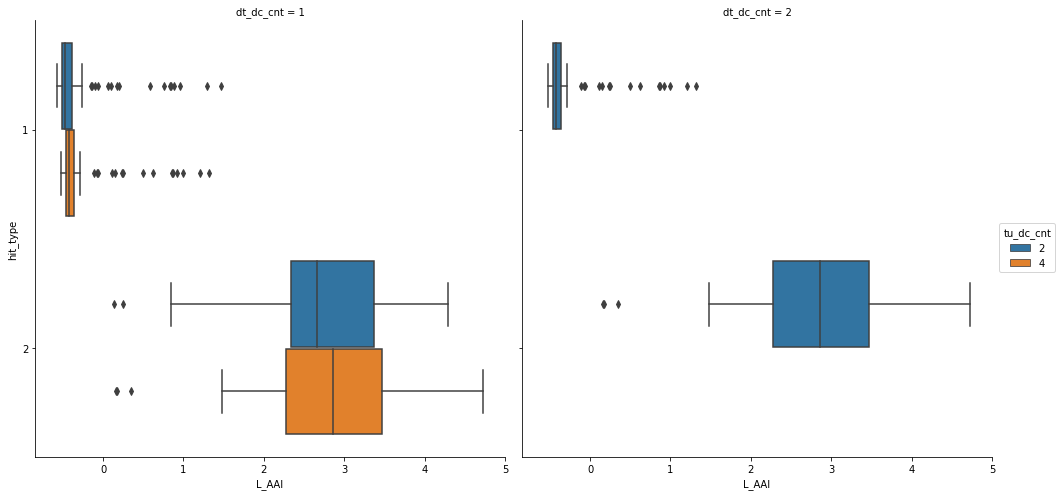

<Figure size 1440x360 with 0 Axes>

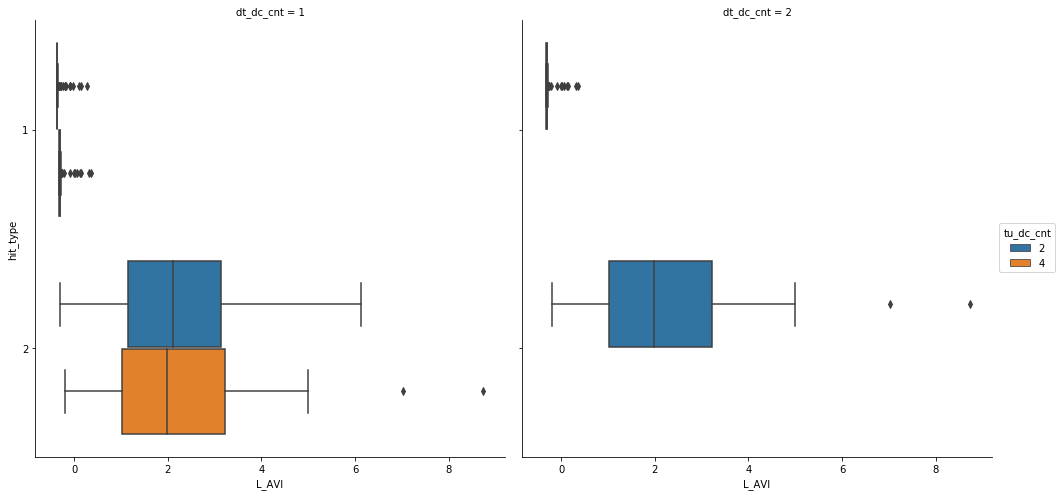

<Figure size 1440x360 with 0 Axes>

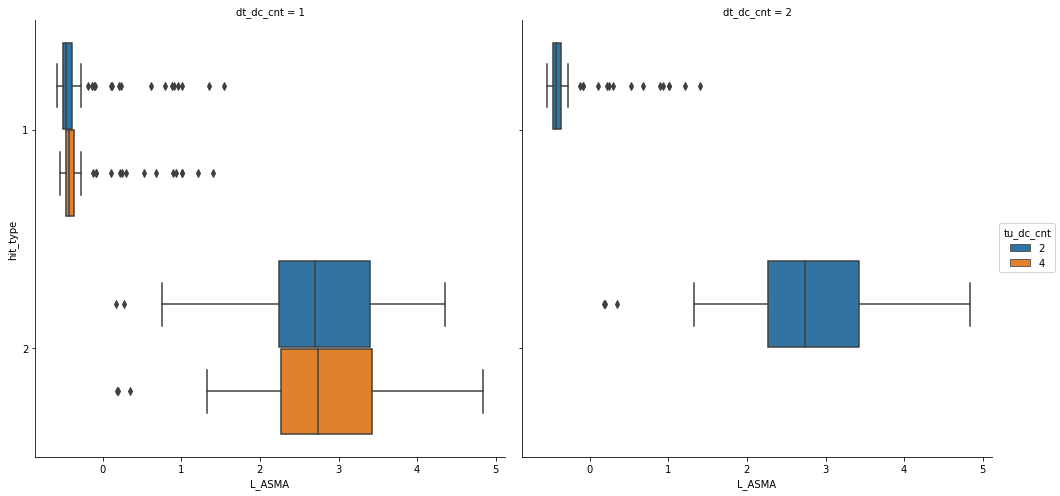

<Figure size 1440x360 with 0 Axes>

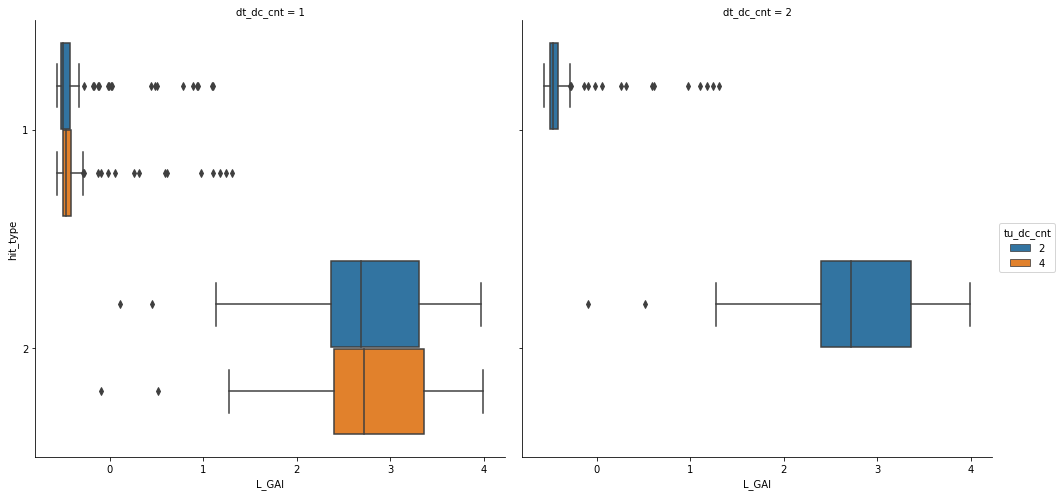

<Figure size 1440x360 with 0 Axes>

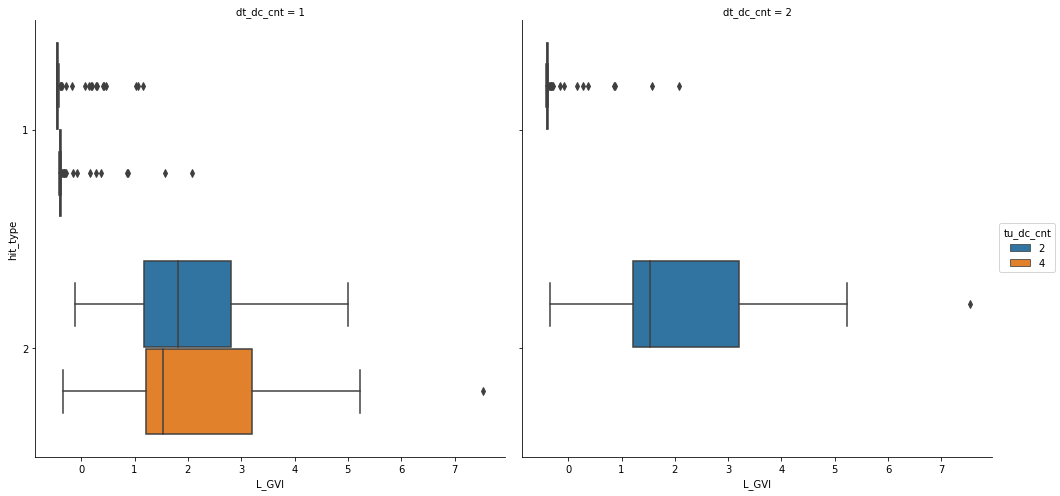

<Figure size 1440x360 with 0 Axes>

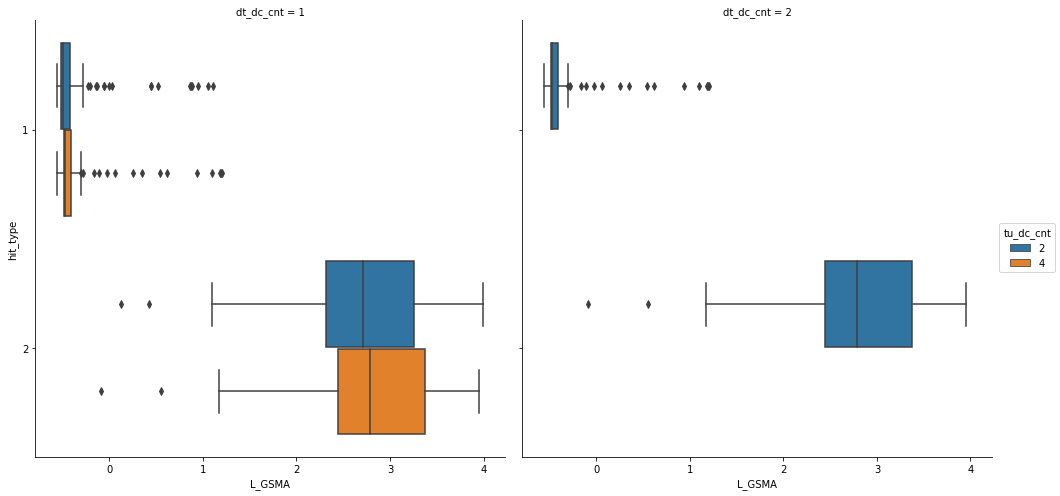

<Figure size 1440x360 with 0 Axes>

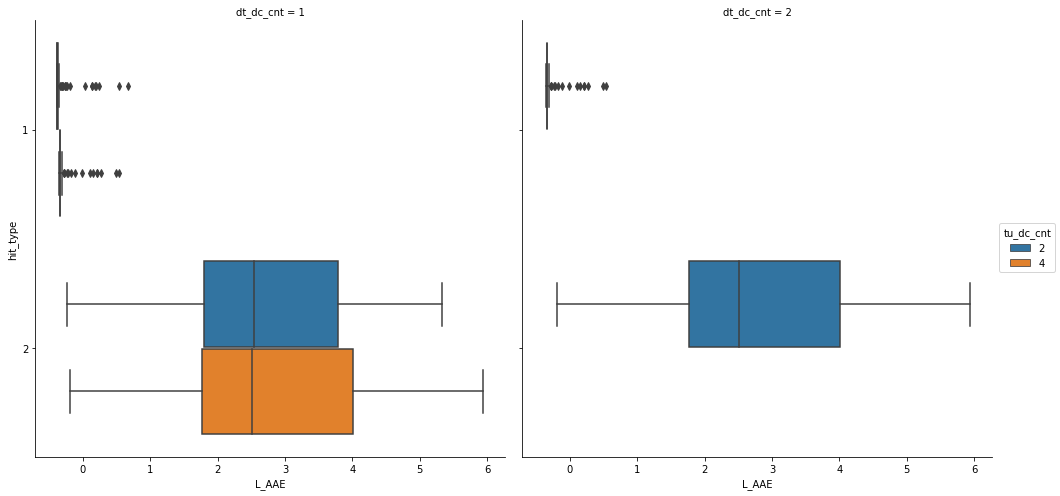

<Figure size 1440x360 with 0 Axes>

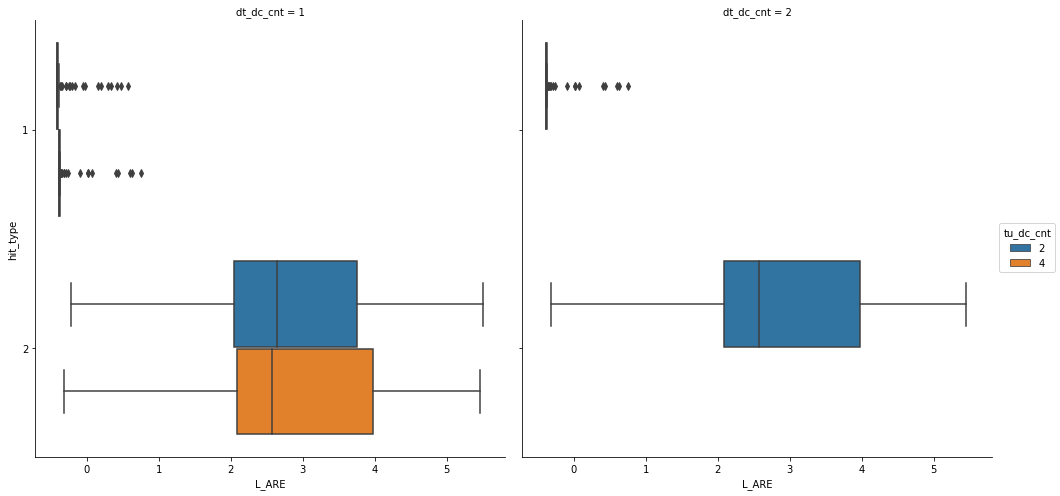

<Figure size 1440x360 with 0 Axes>

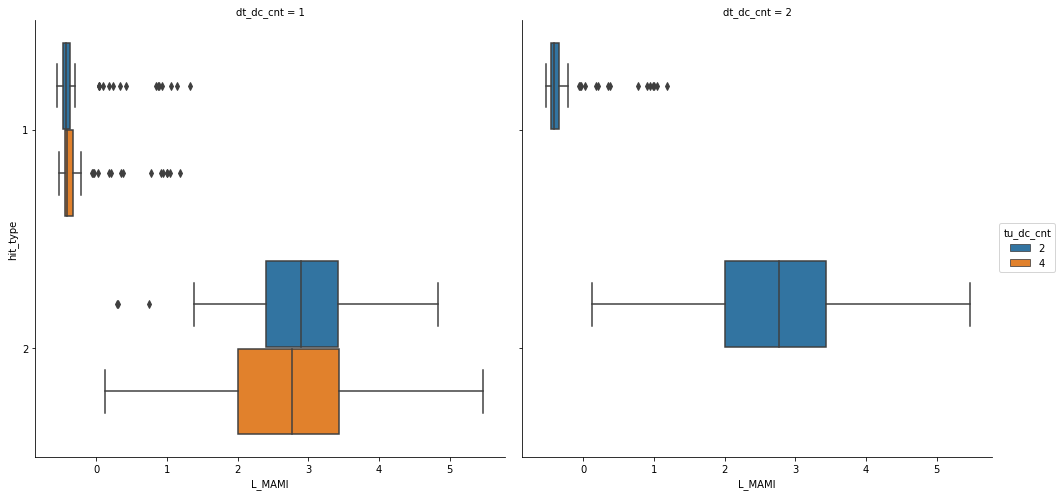

<Figure size 1440x360 with 0 Axes>

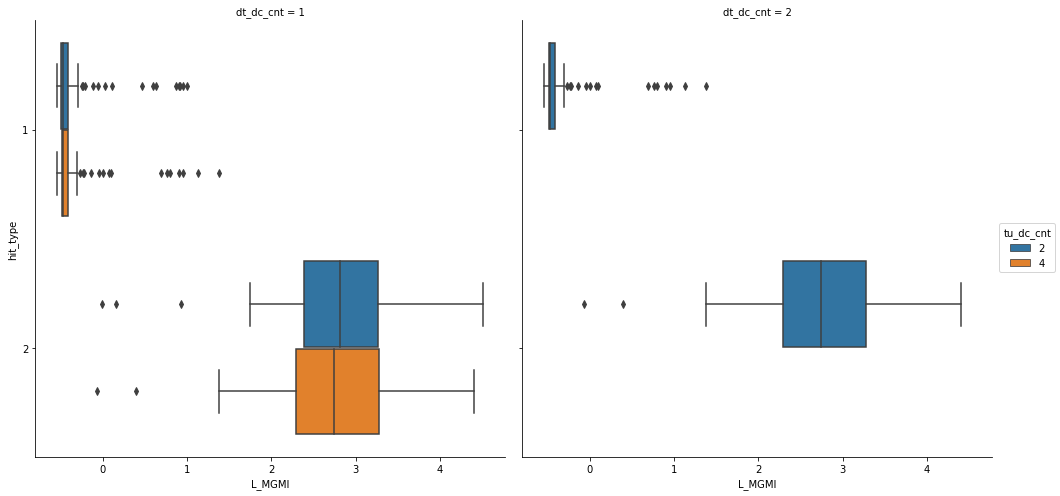

<Figure size 1440x360 with 0 Axes>

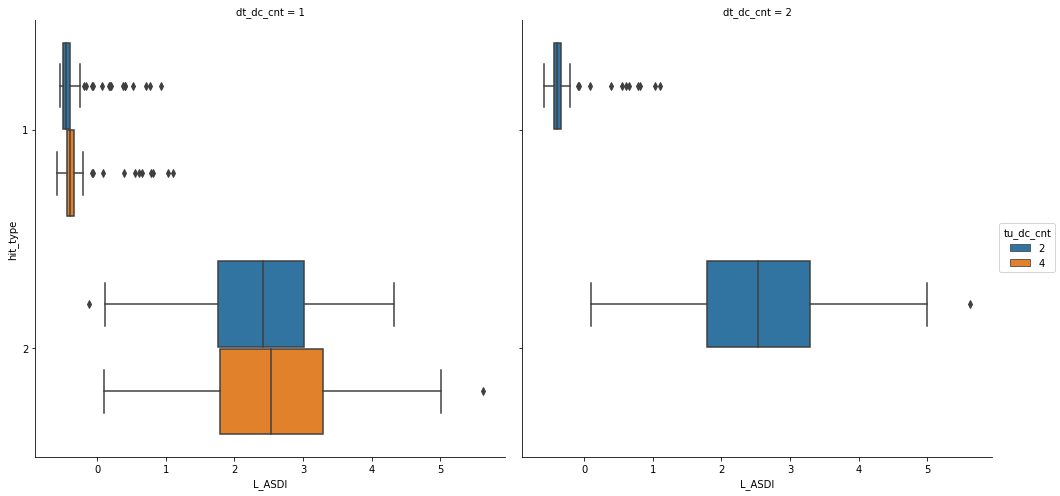

<Figure size 1440x360 with 0 Axes>

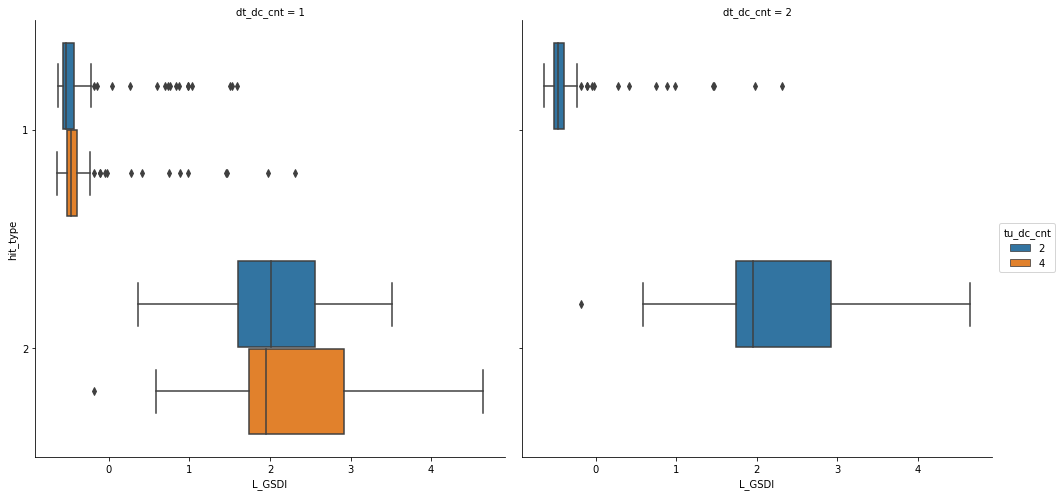

<Figure size 1440x360 with 0 Axes>

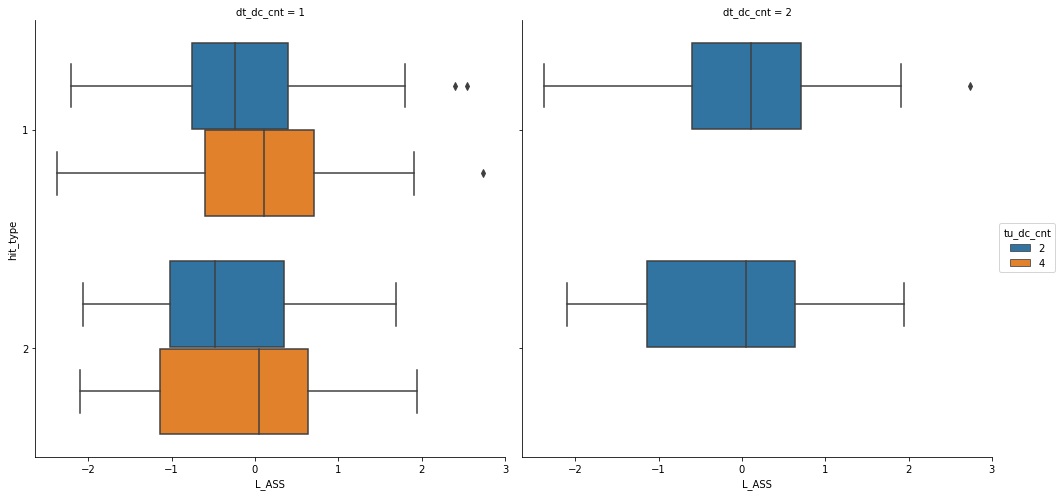

<Figure size 1440x360 with 0 Axes>

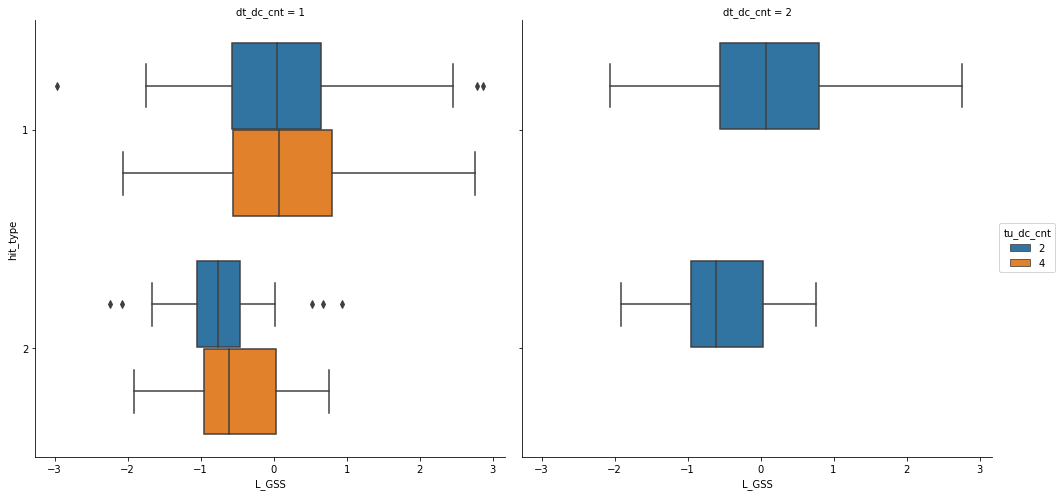

<Figure size 1440x360 with 0 Axes>

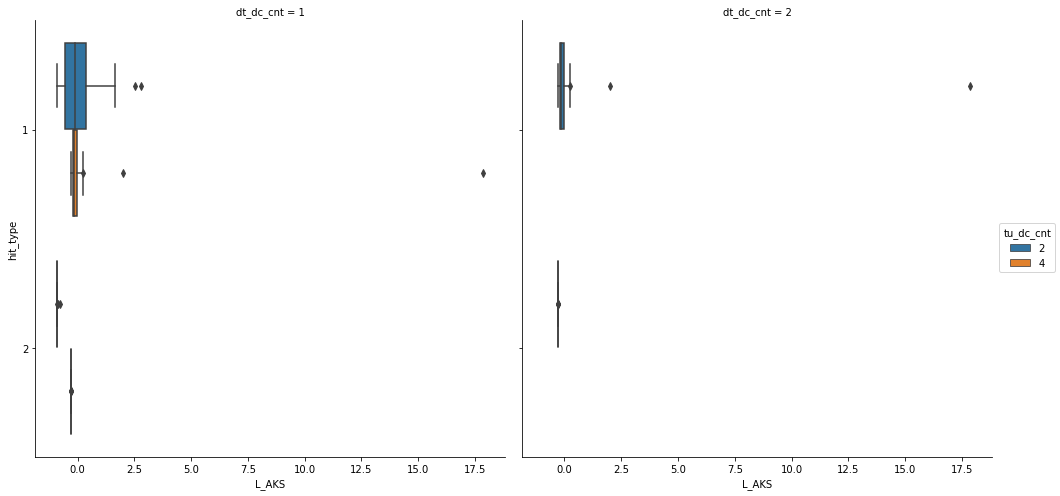

<Figure size 1440x360 with 0 Axes>

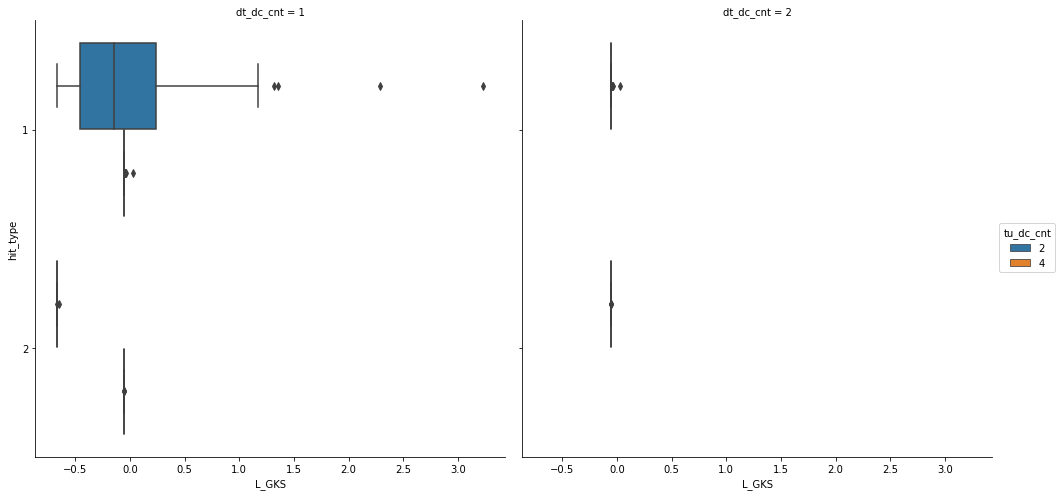

<Figure size 1440x360 with 0 Axes>

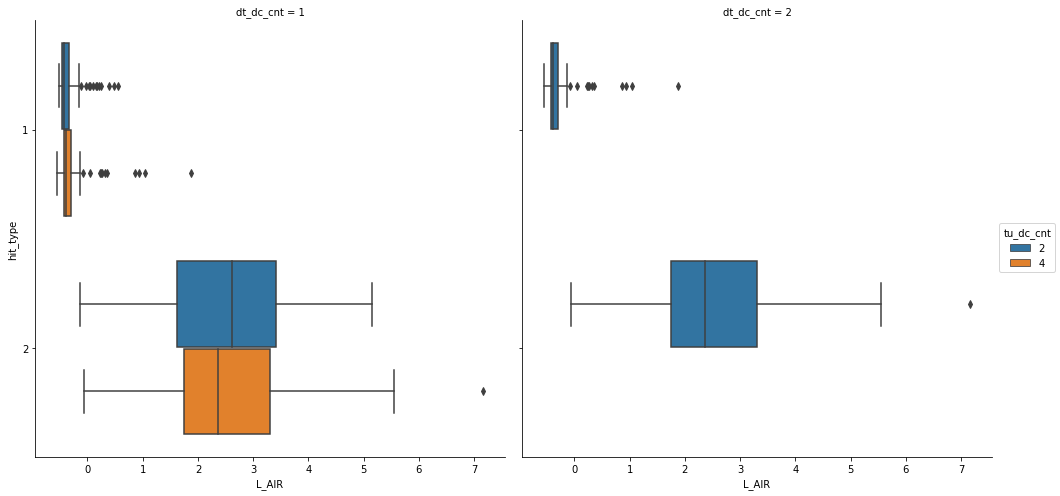

<Figure size 1440x360 with 0 Axes>

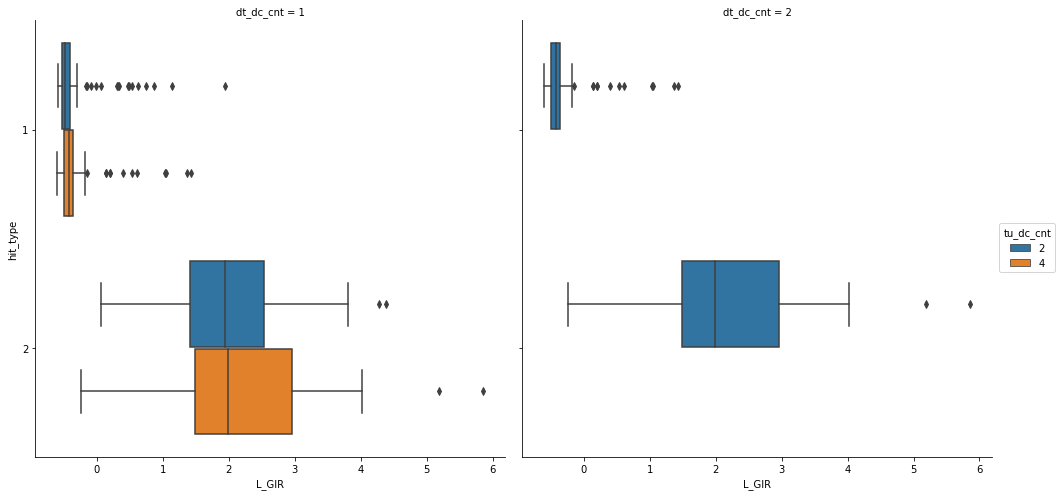

<Figure size 1440x360 with 0 Axes>

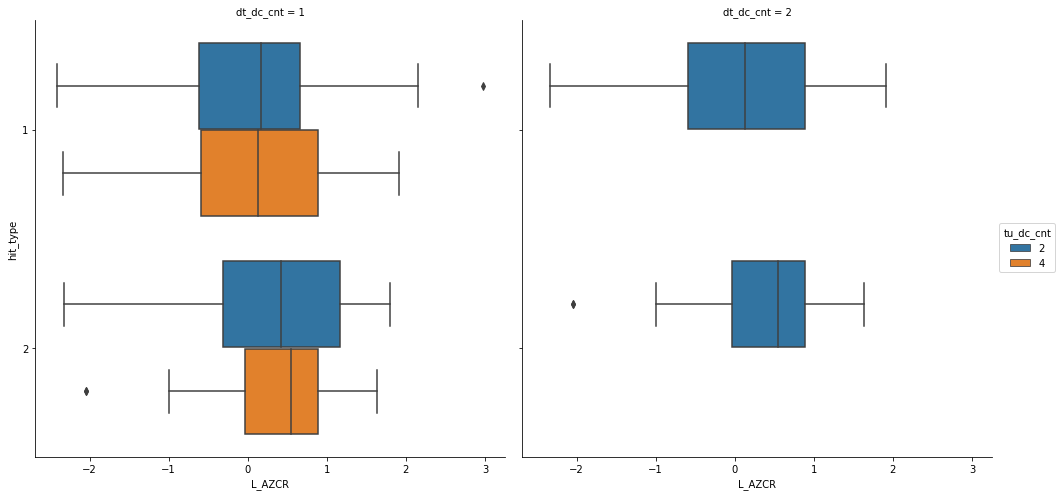

<Figure size 1440x360 with 0 Axes>

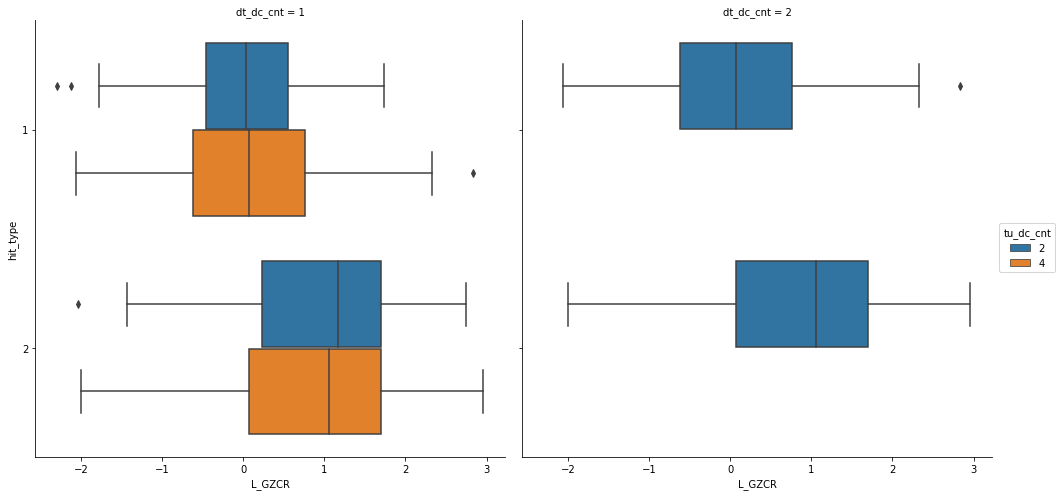

<Figure size 1440x360 with 0 Axes>

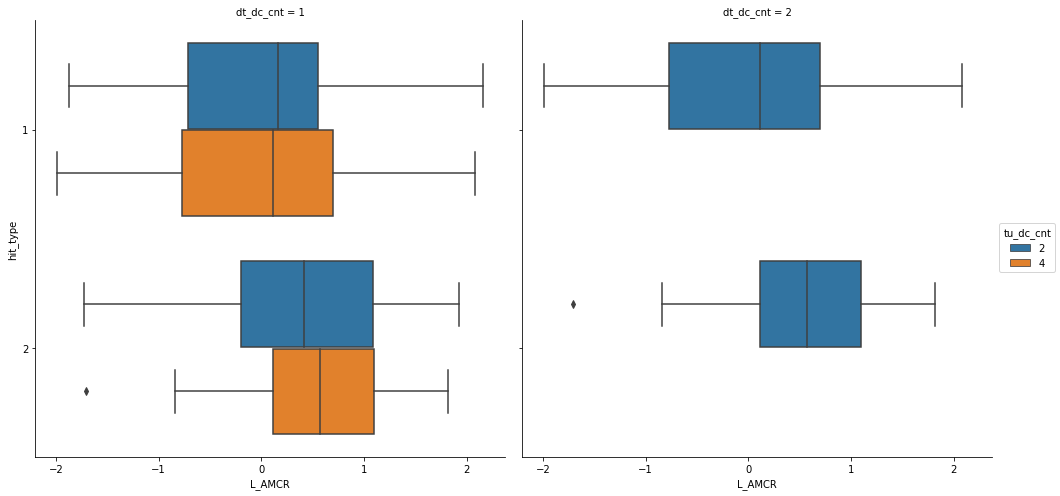

<Figure size 1440x360 with 0 Axes>

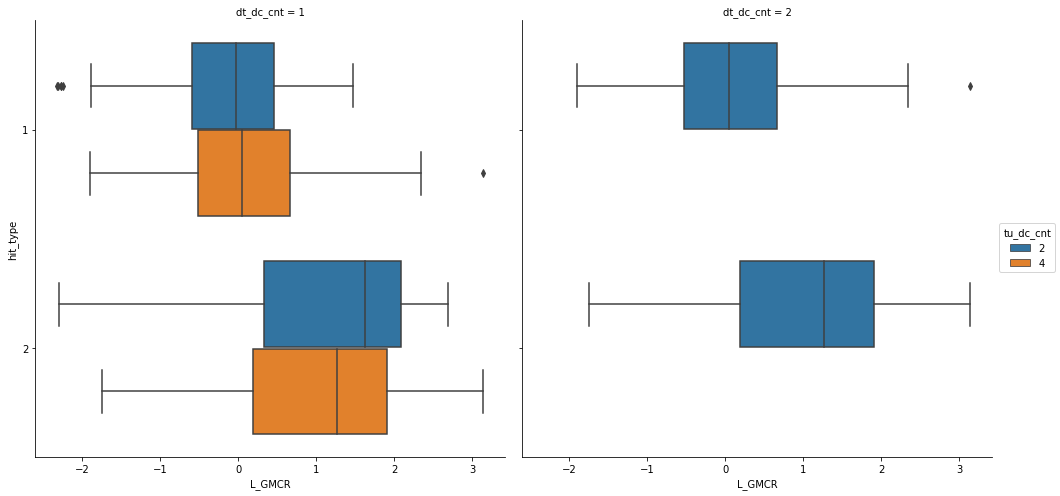

<Figure size 1440x360 with 0 Axes>

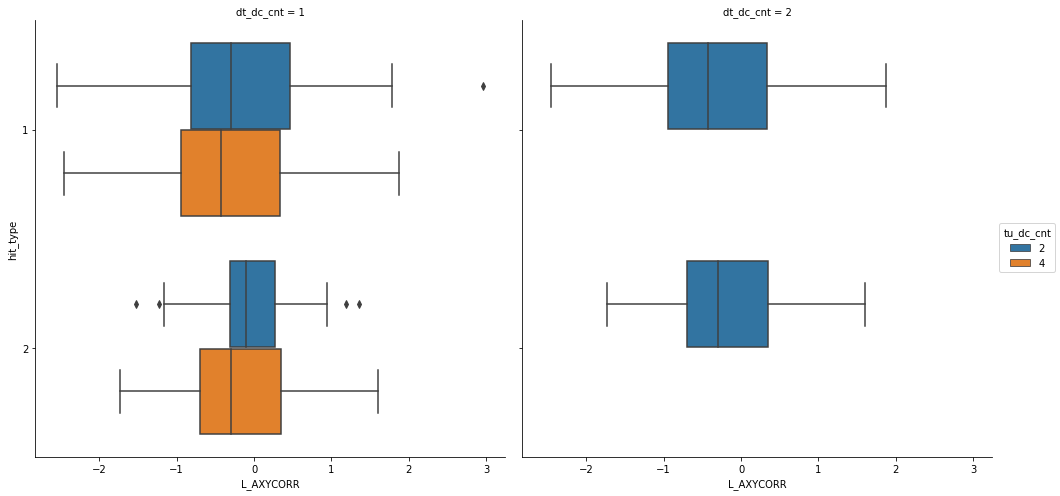

<Figure size 1440x360 with 0 Axes>

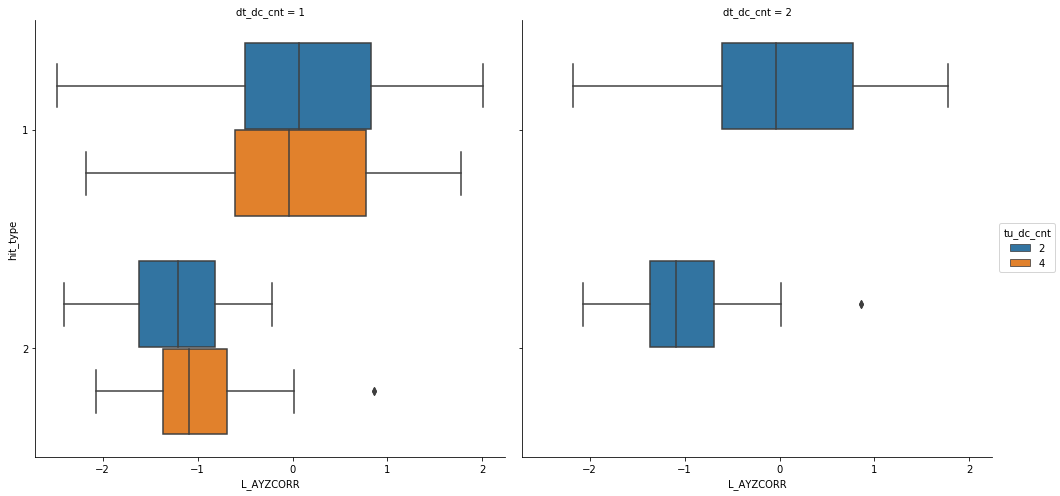

<Figure size 1440x360 with 0 Axes>

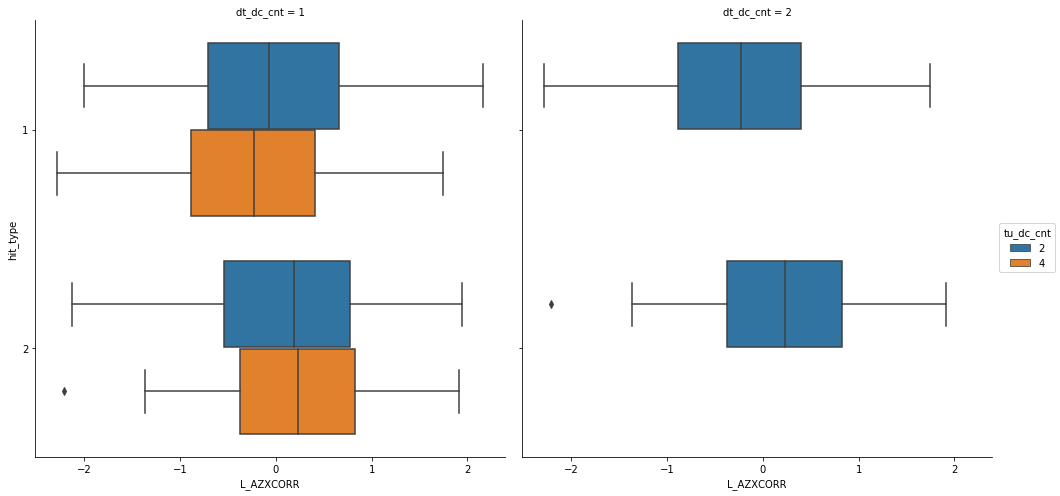

<Figure size 1440x360 with 0 Axes>

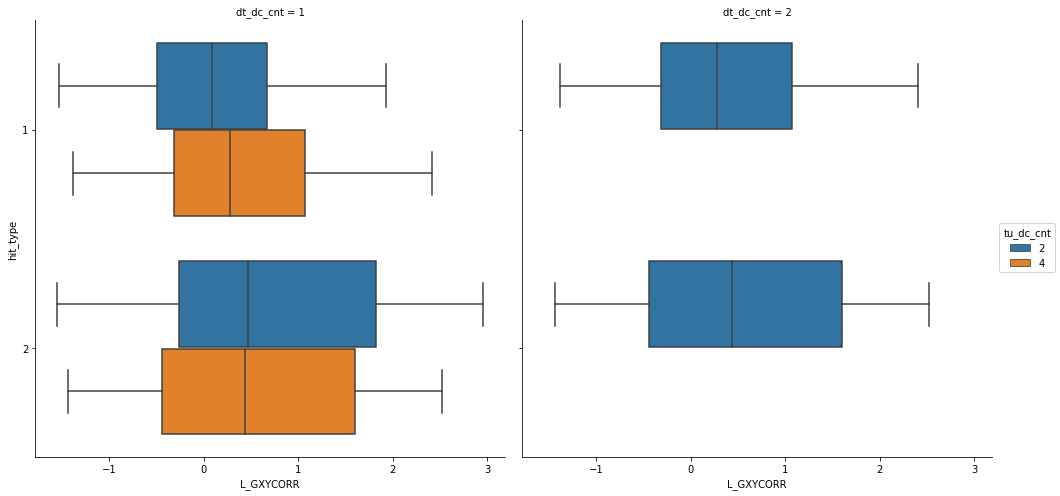

<Figure size 1440x360 with 0 Axes>

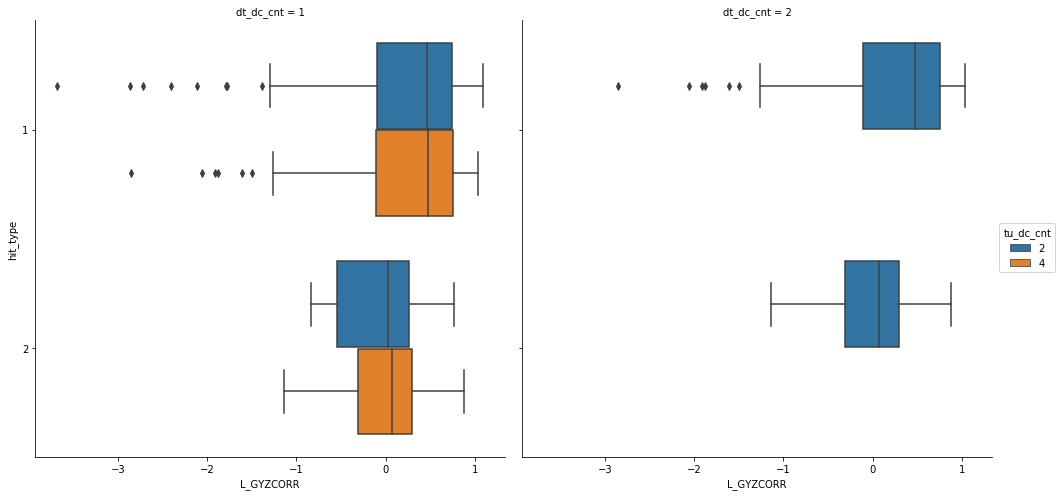

<Figure size 1440x360 with 0 Axes>

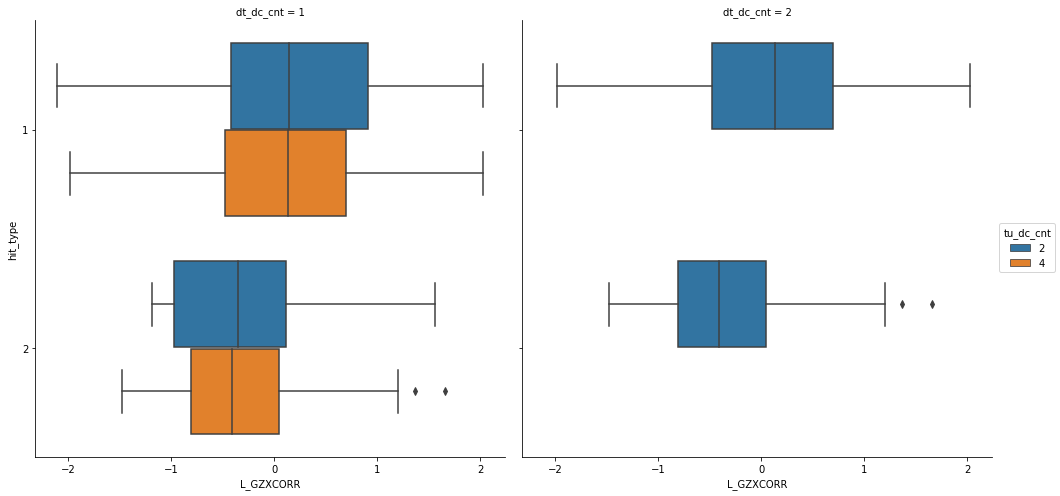

<Figure size 1440x360 with 0 Axes>

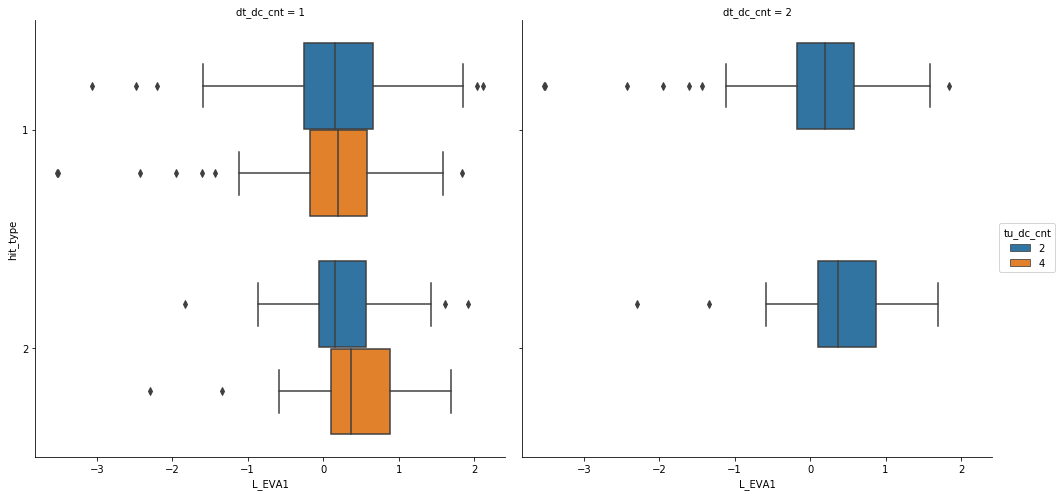

<Figure size 1440x360 with 0 Axes>

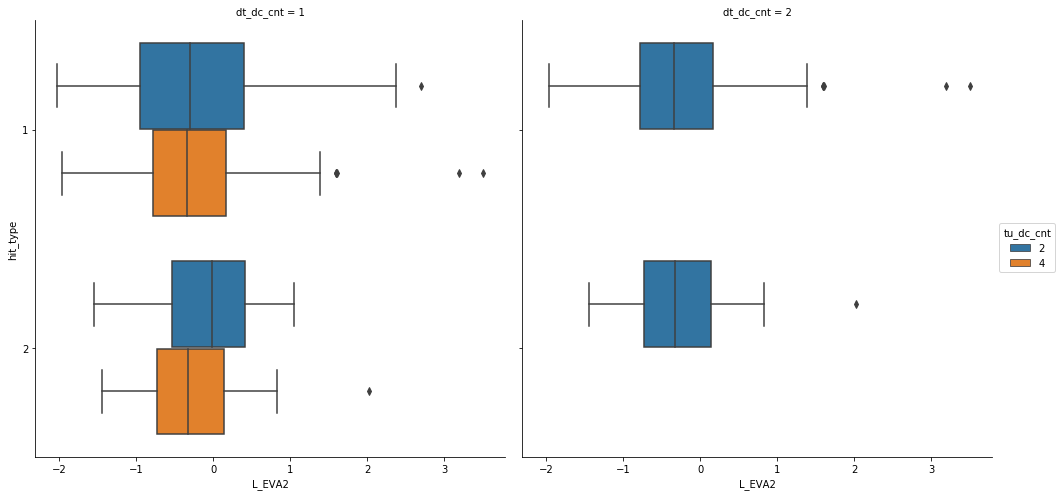

<Figure size 1440x360 with 0 Axes>

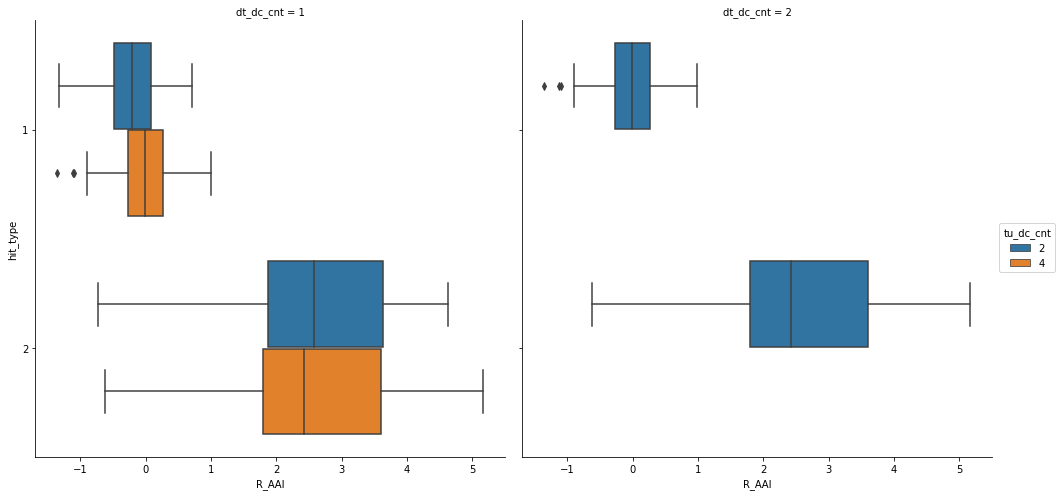

<Figure size 1440x360 with 0 Axes>

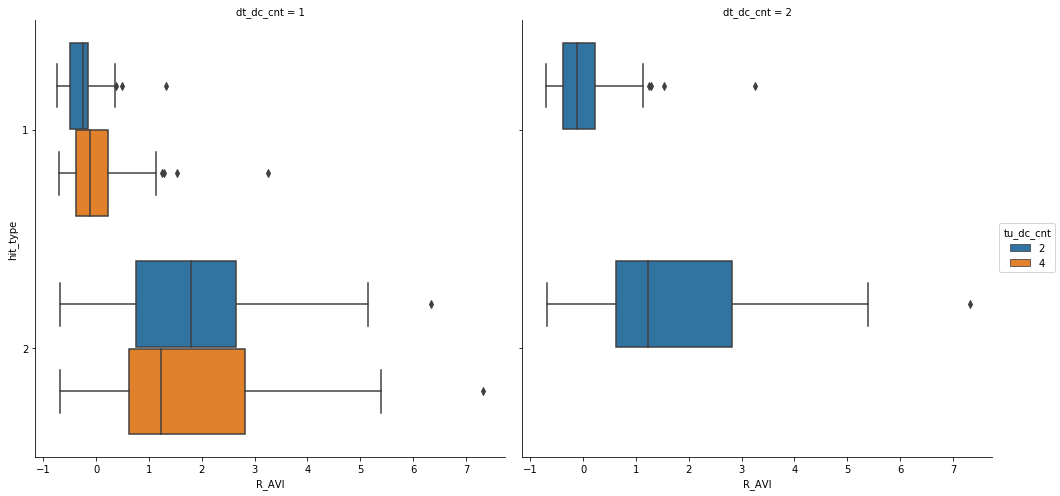

<Figure size 1440x360 with 0 Axes>

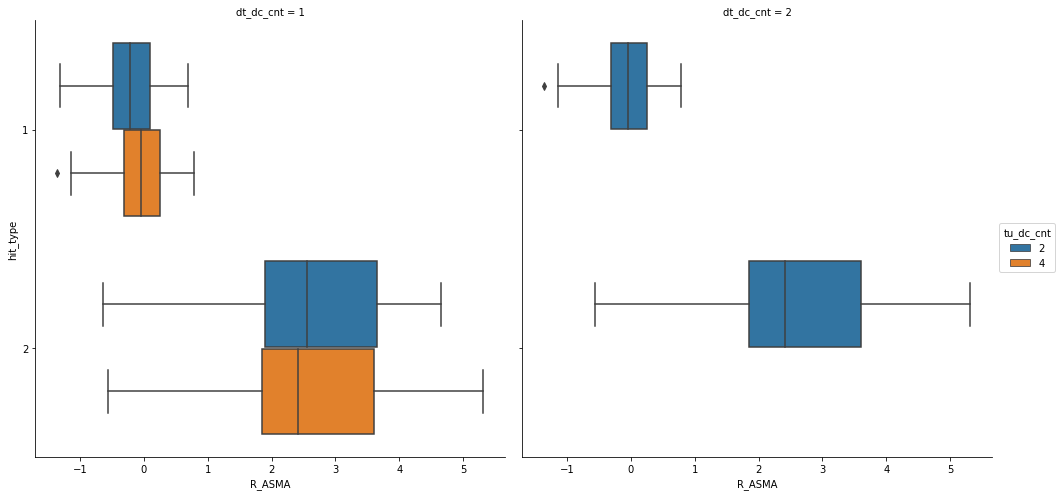

<Figure size 1440x360 with 0 Axes>

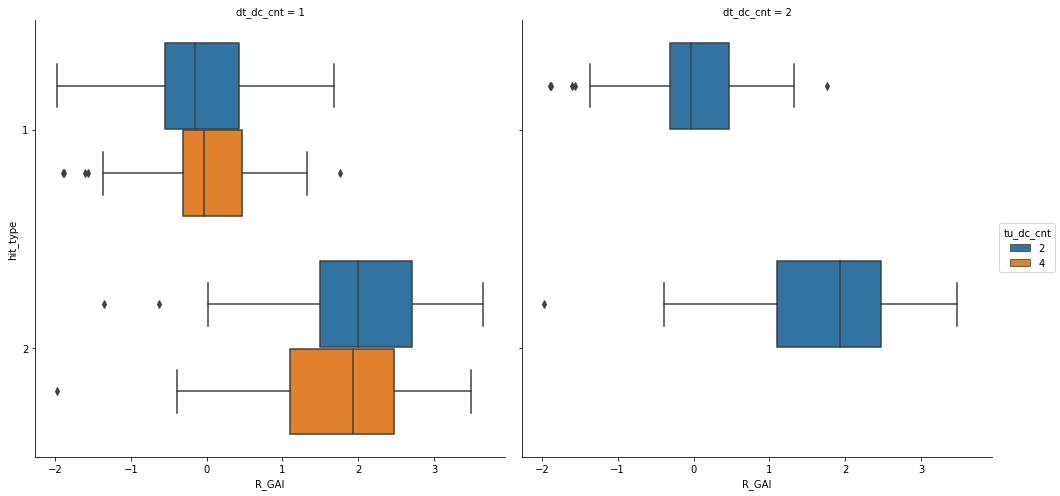

<Figure size 1440x360 with 0 Axes>

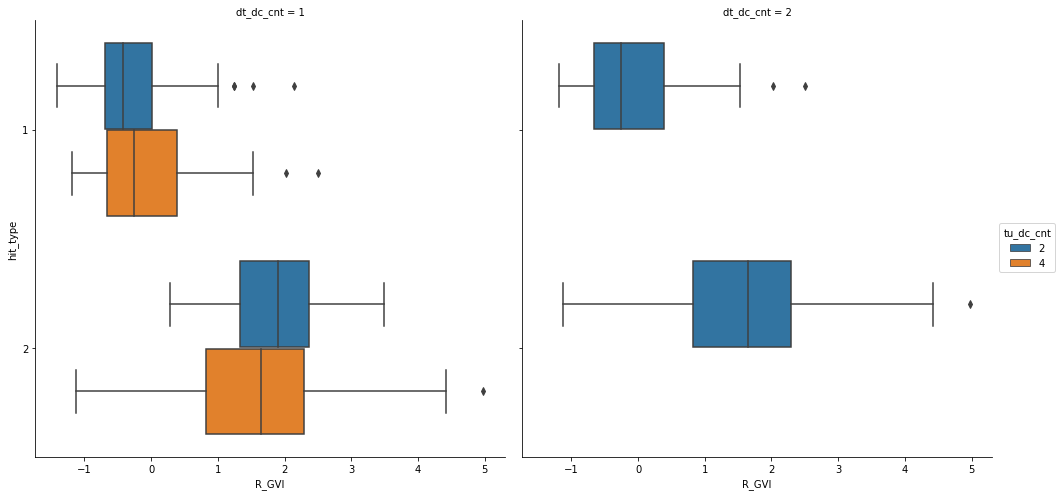

<Figure size 1440x360 with 0 Axes>

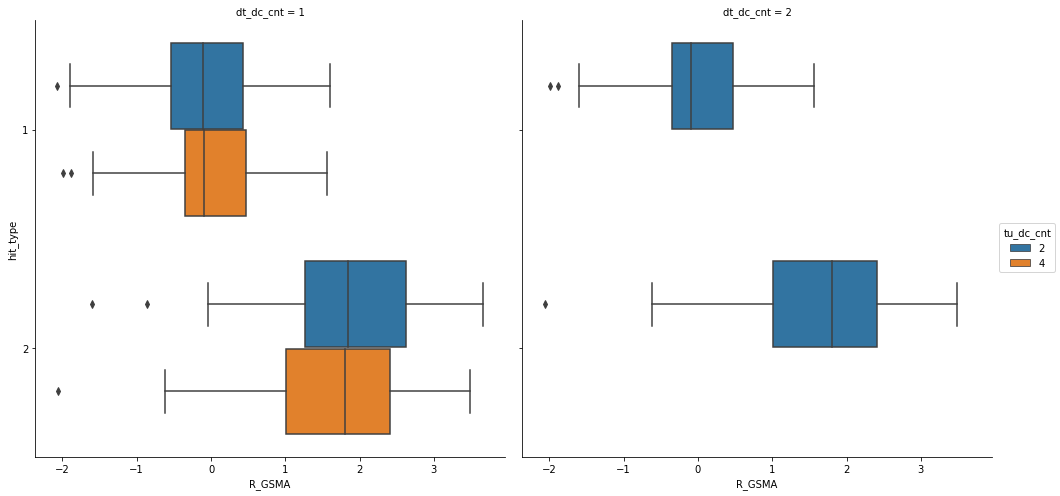

<Figure size 1440x360 with 0 Axes>

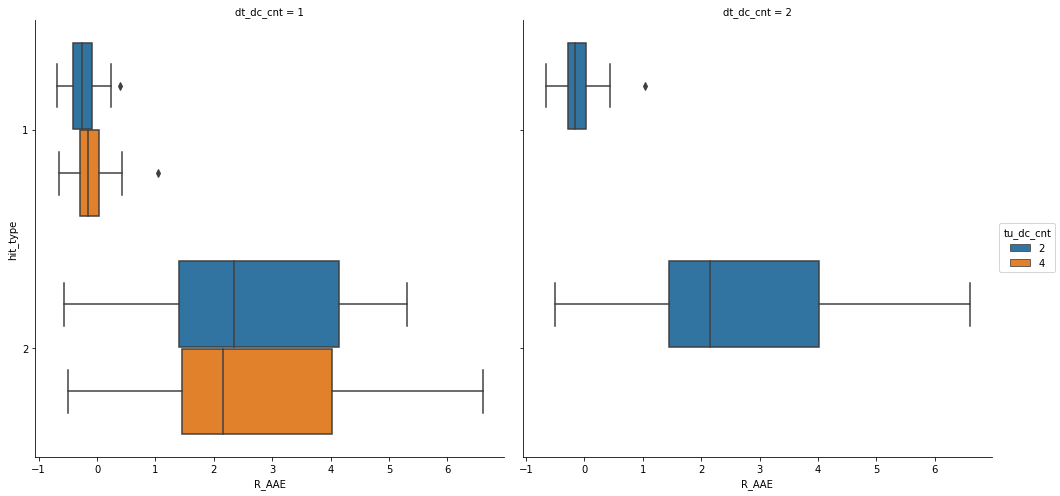

<Figure size 1440x360 with 0 Axes>

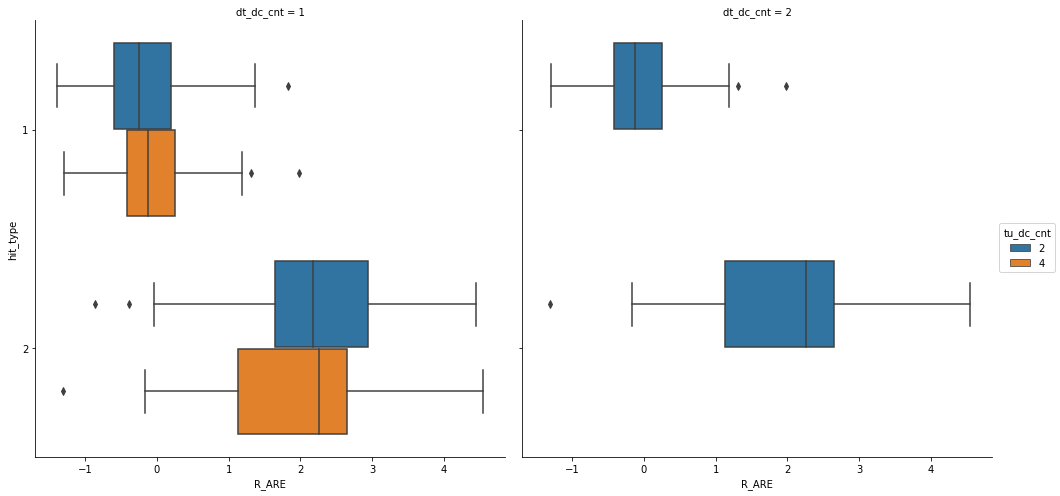

<Figure size 1440x360 with 0 Axes>

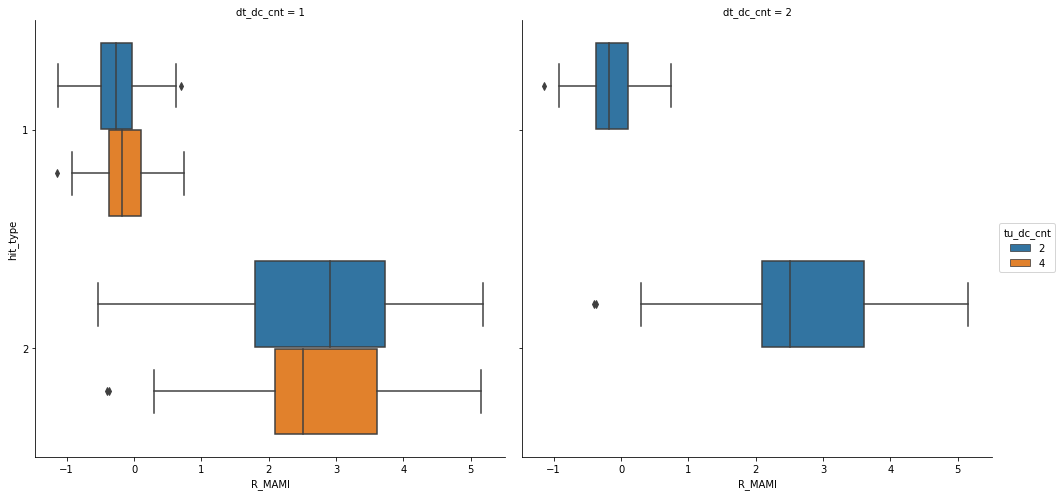

<Figure size 1440x360 with 0 Axes>

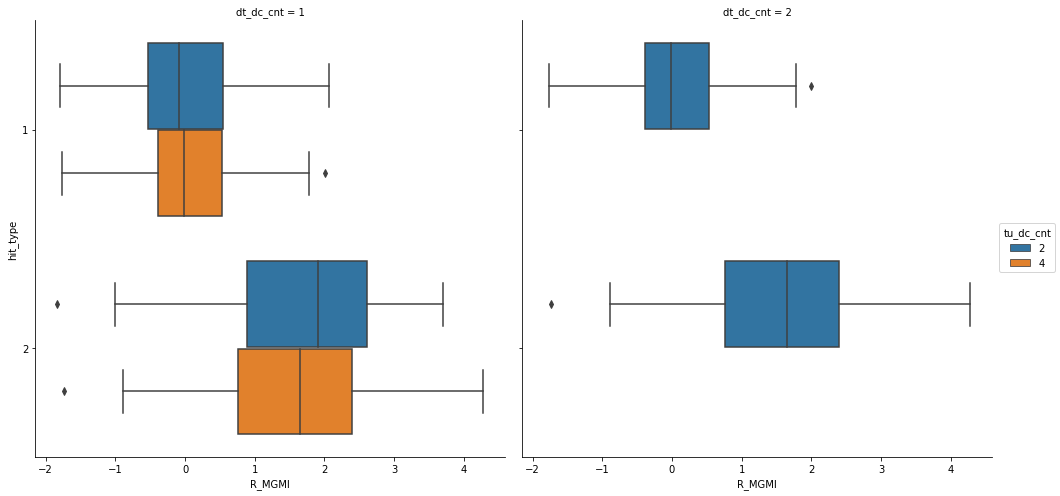

<Figure size 1440x360 with 0 Axes>

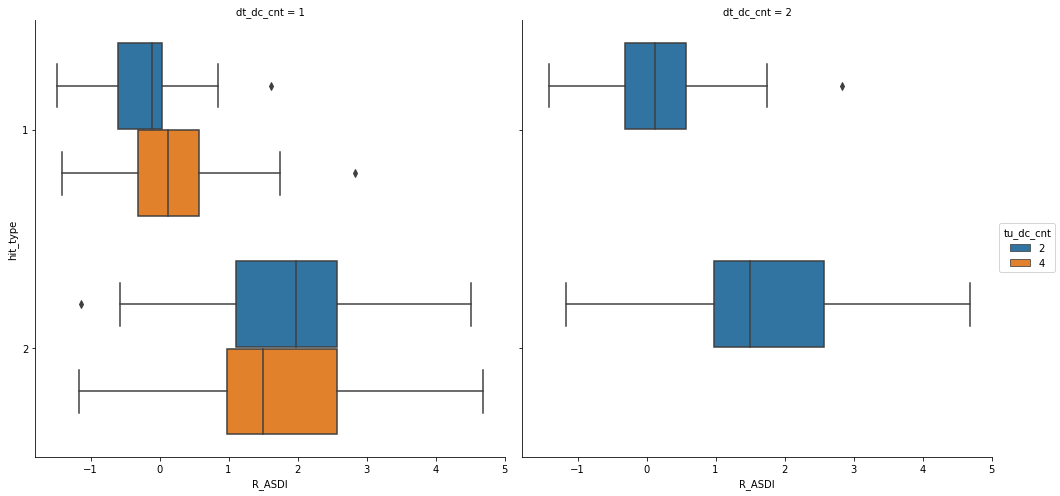

<Figure size 1440x360 with 0 Axes>

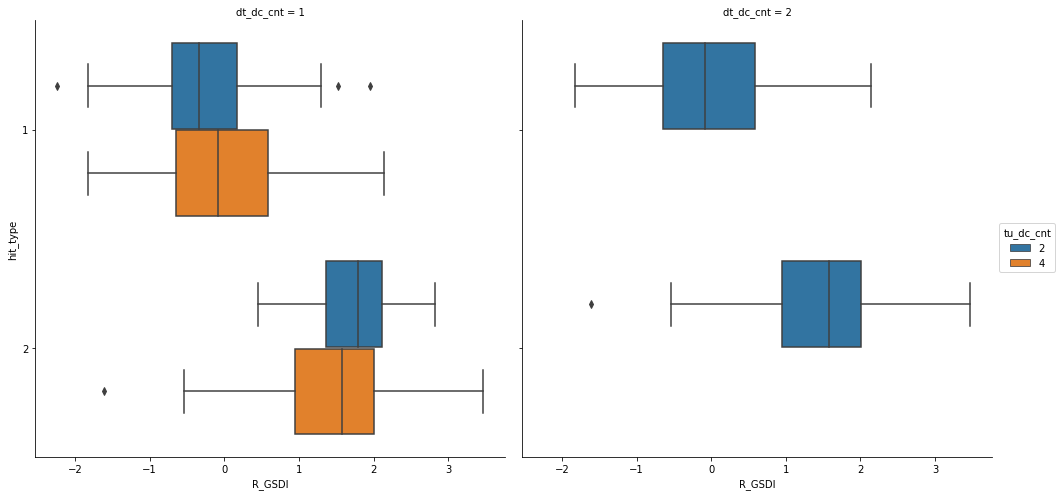

<Figure size 1440x360 with 0 Axes>

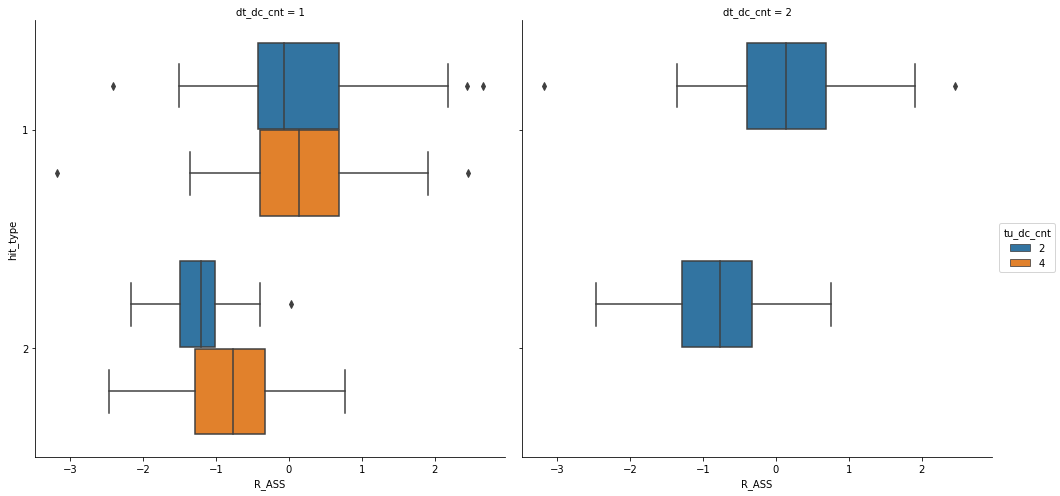

<Figure size 1440x360 with 0 Axes>

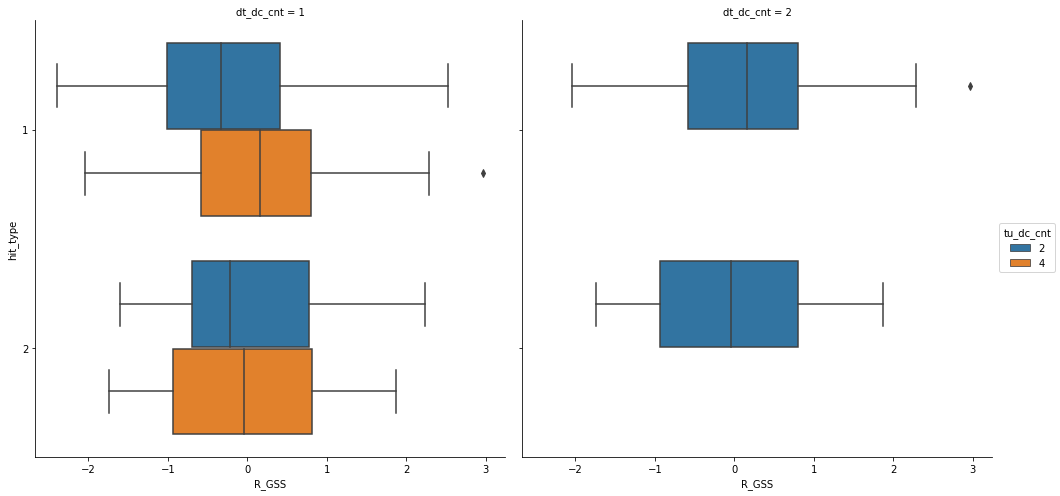

<Figure size 1440x360 with 0 Axes>

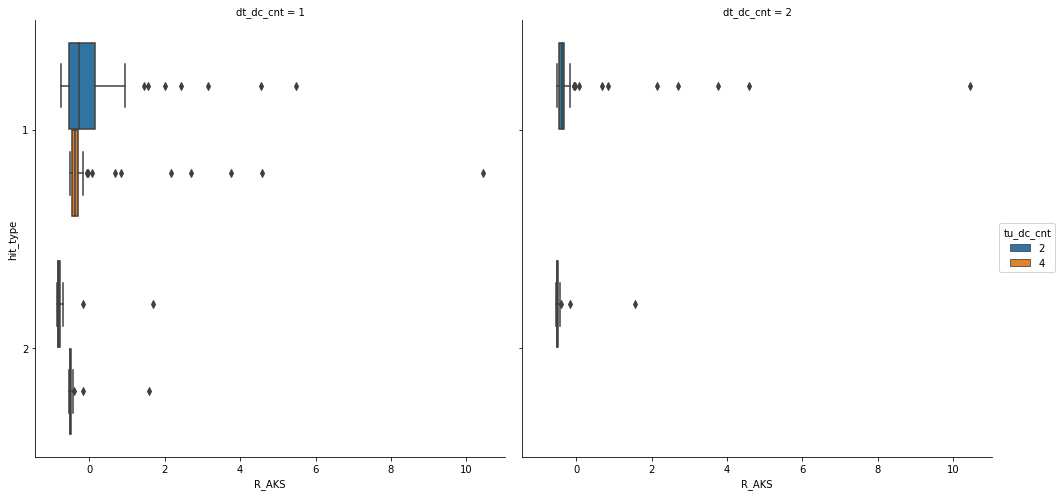

<Figure size 1440x360 with 0 Axes>

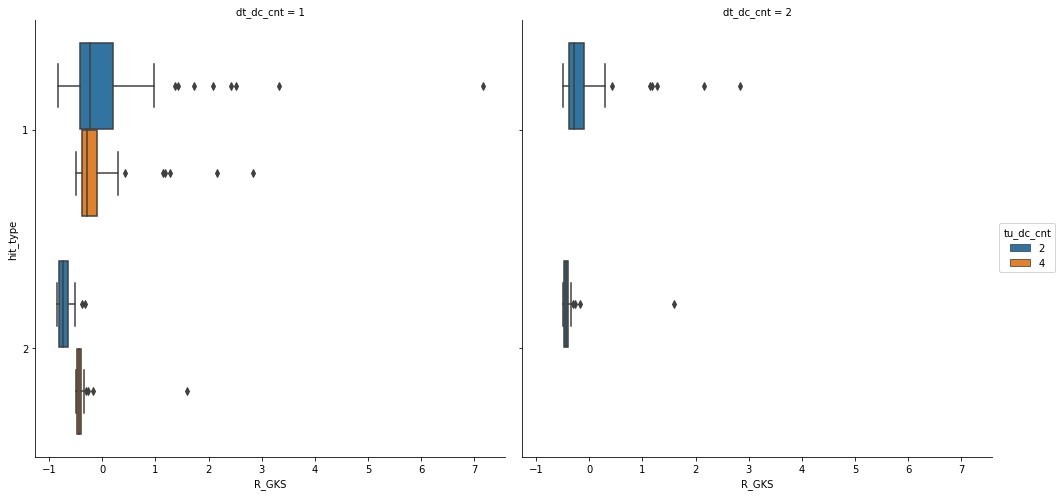

<Figure size 1440x360 with 0 Axes>

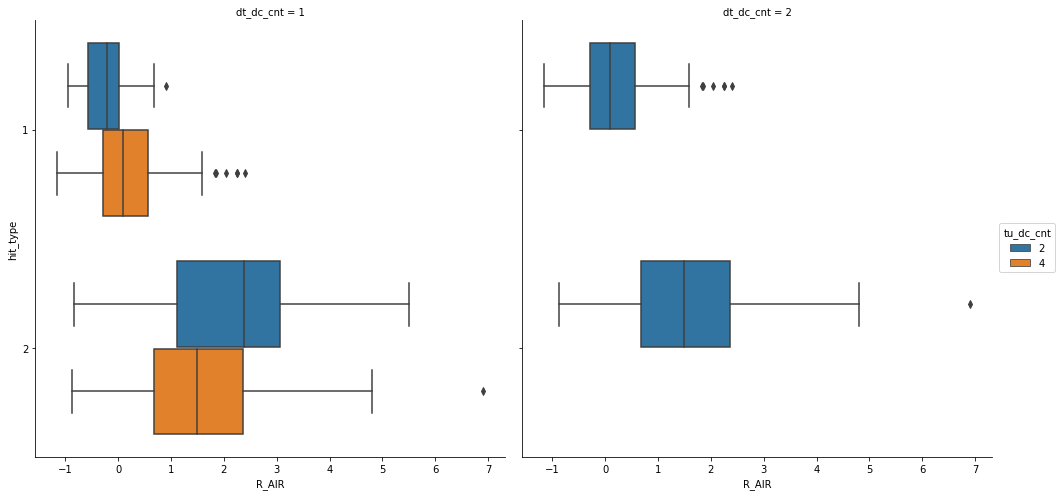

<Figure size 1440x360 with 0 Axes>

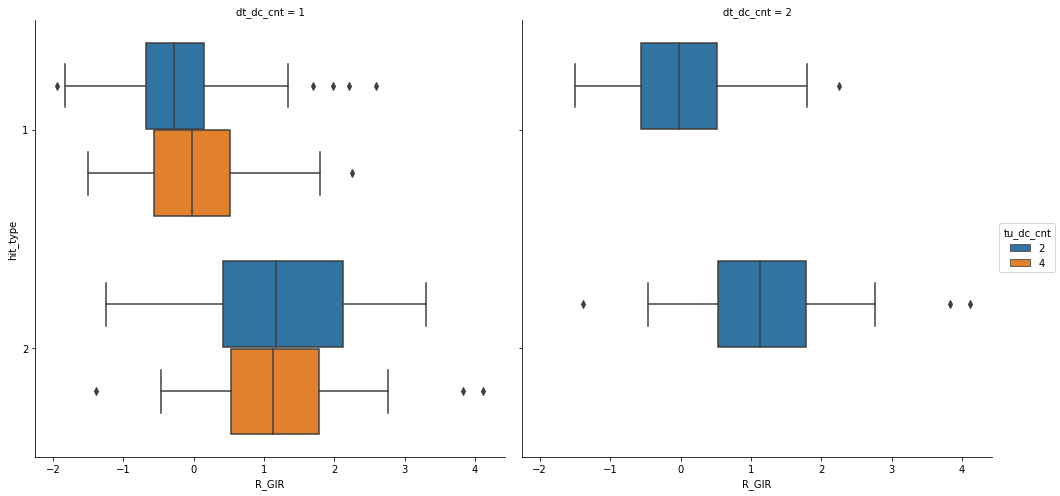

<Figure size 1440x360 with 0 Axes>

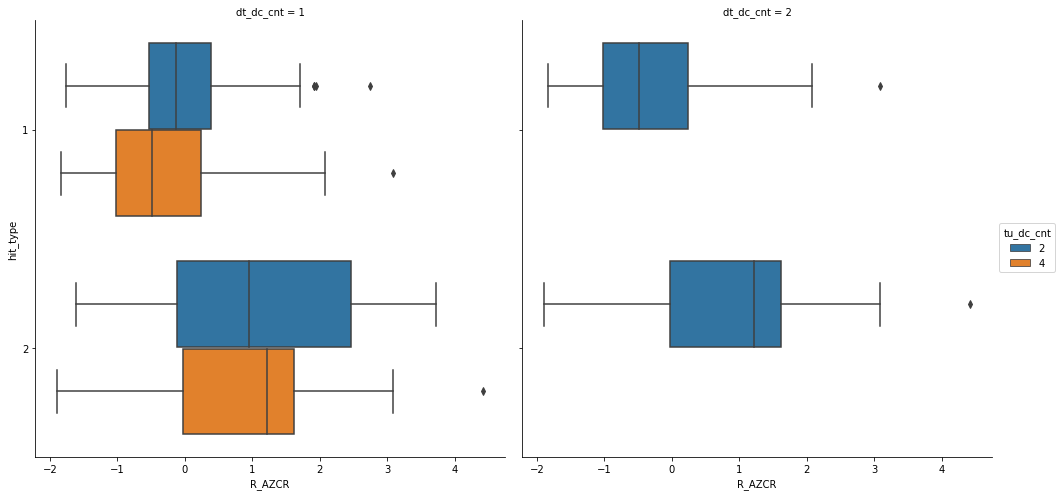

<Figure size 1440x360 with 0 Axes>

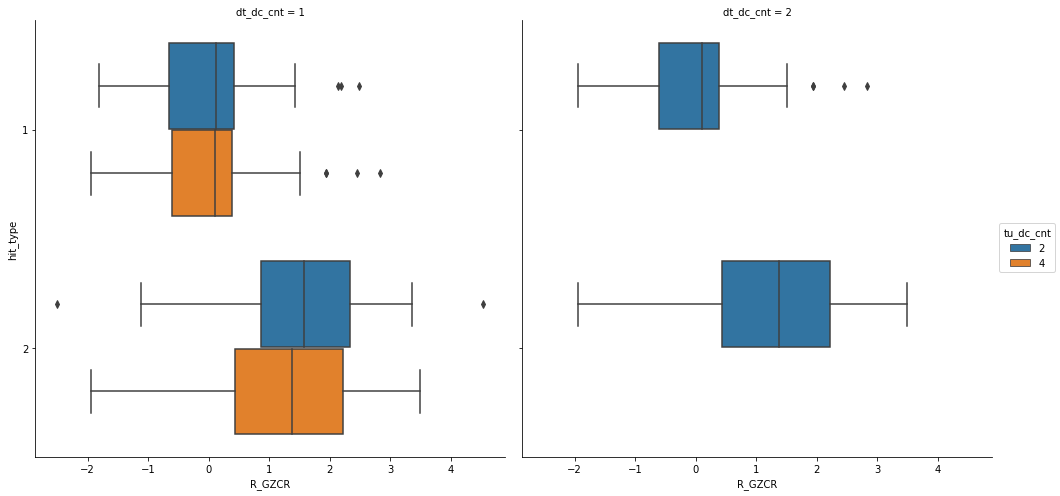

<Figure size 1440x360 with 0 Axes>

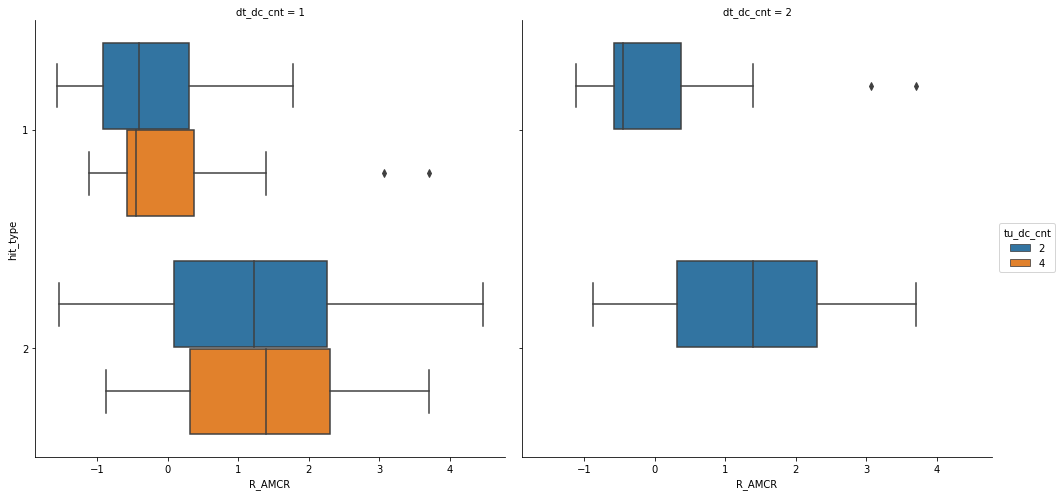

<Figure size 1440x360 with 0 Axes>

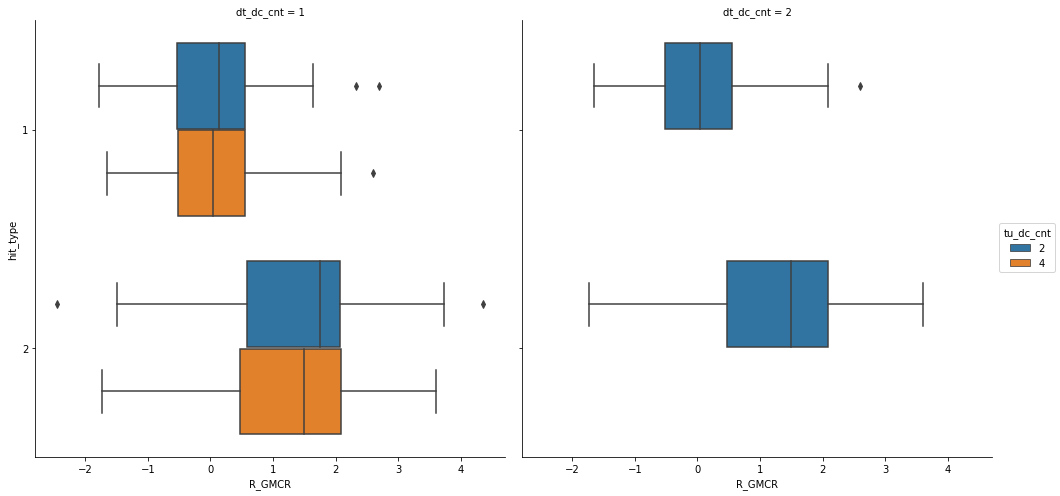

<Figure size 1440x360 with 0 Axes>

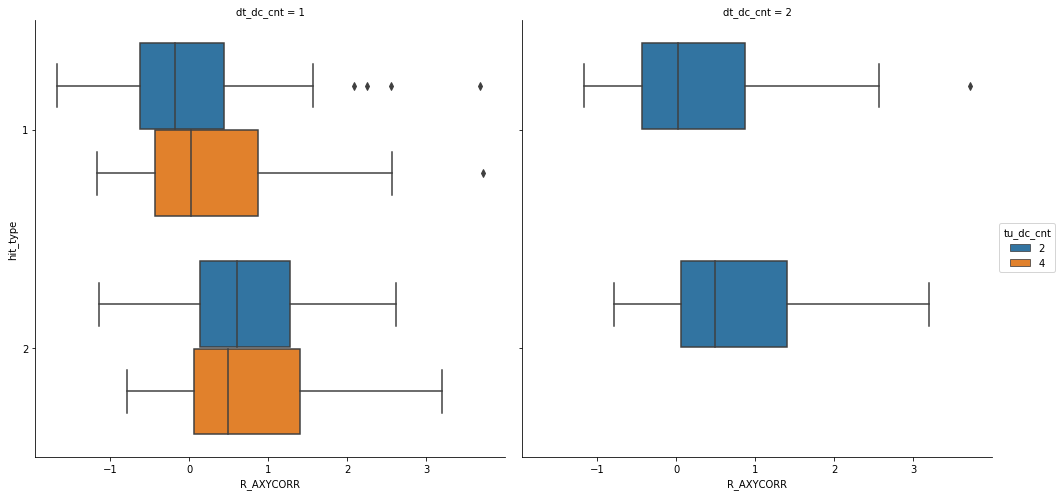

<Figure size 1440x360 with 0 Axes>

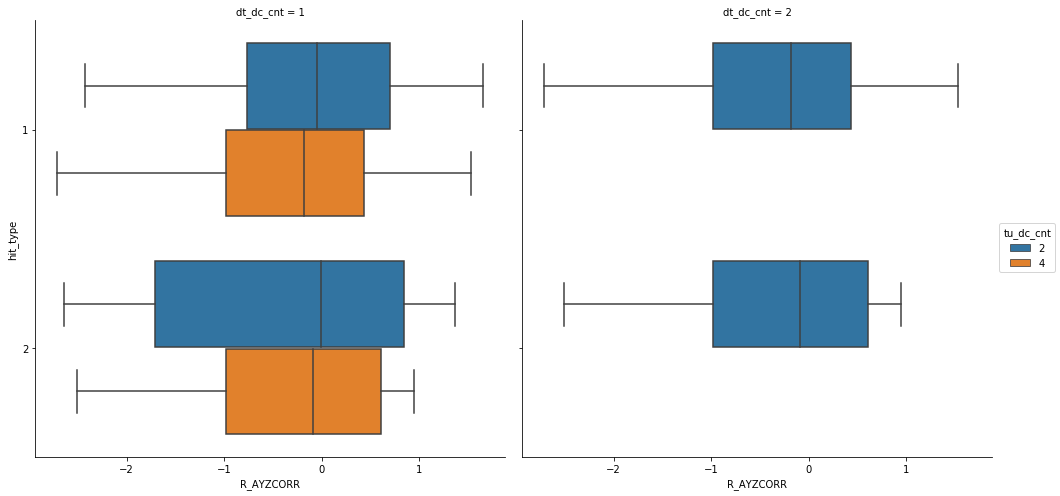

<Figure size 1440x360 with 0 Axes>

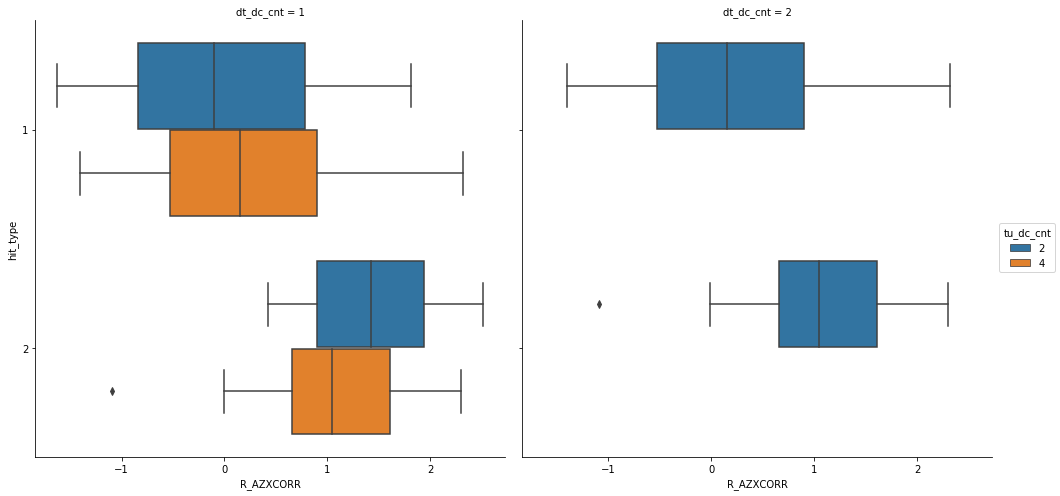

<Figure size 1440x360 with 0 Axes>

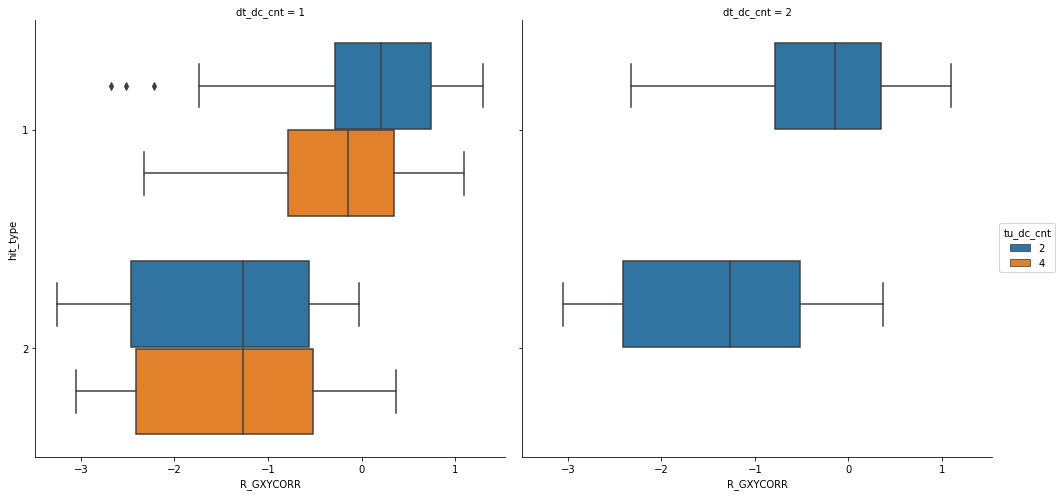

<Figure size 1440x360 with 0 Axes>

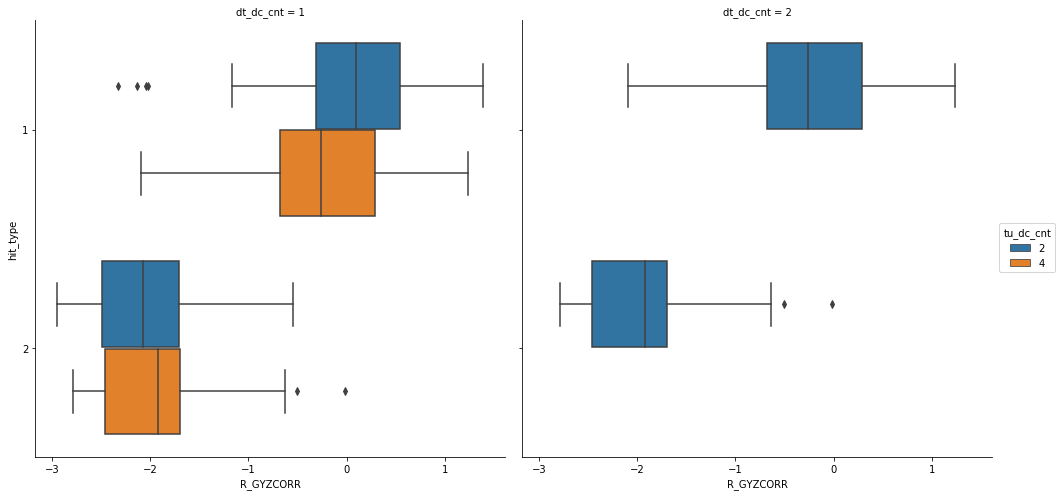

<Figure size 1440x360 with 0 Axes>

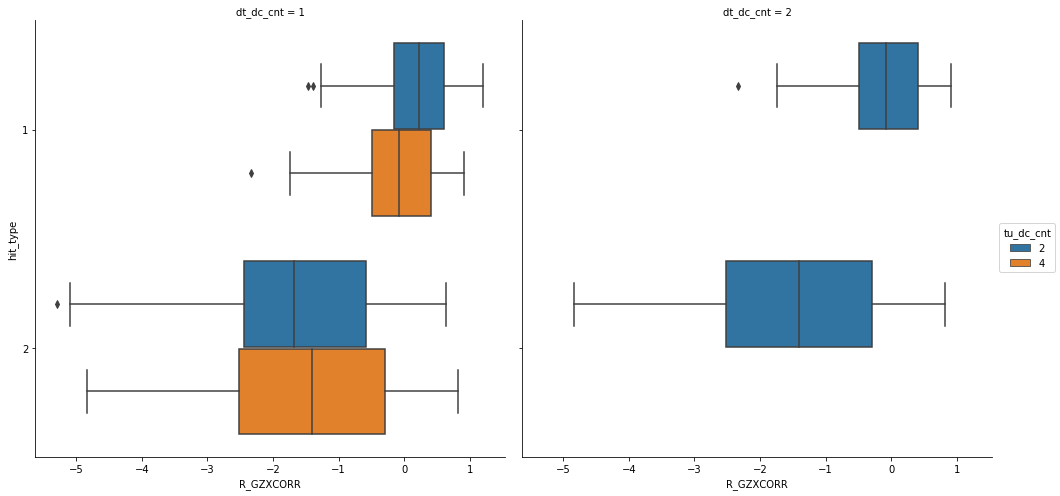

<Figure size 1440x360 with 0 Axes>

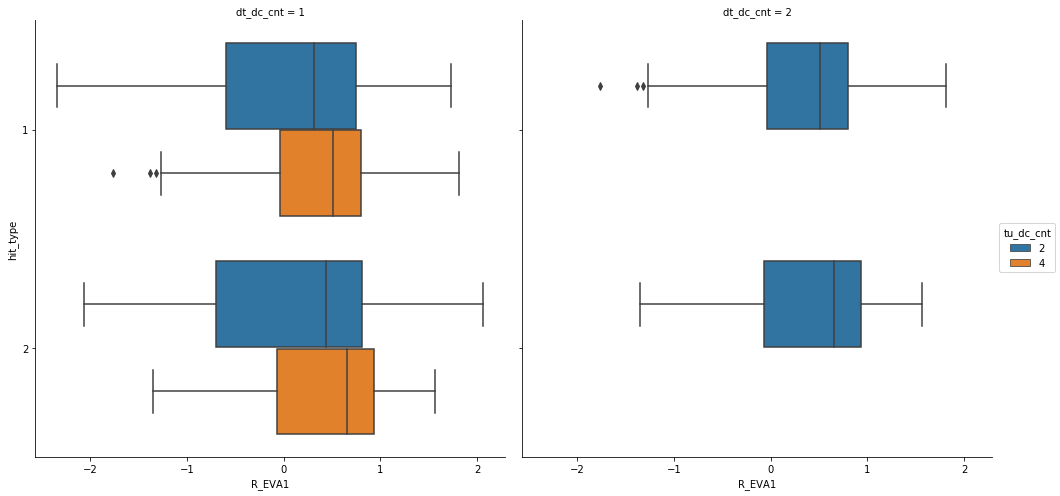

<Figure size 1440x360 with 0 Axes>

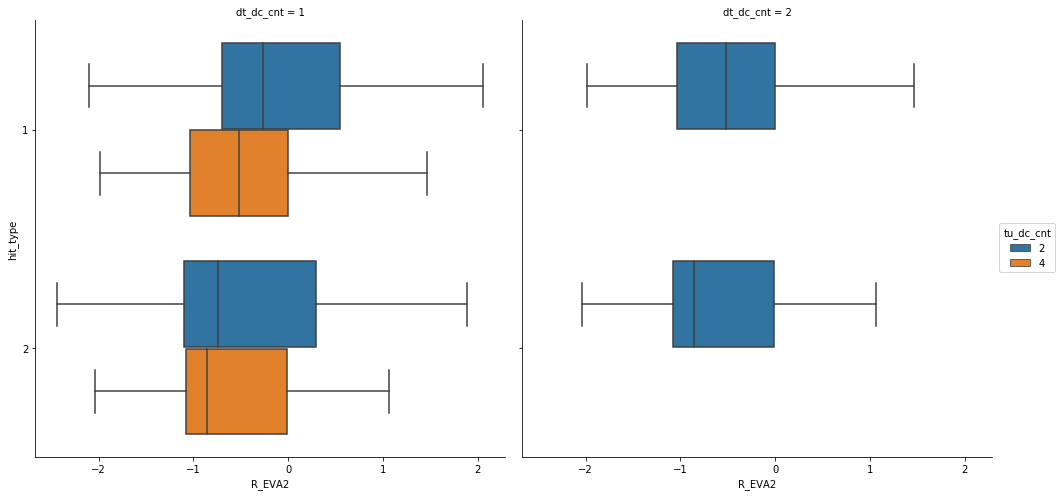

In [11]:
for col in tkconfig.L_STAT_COLS + tkconfig.R_STAT_COLS:
    plt.figure(figsize=(20, 5))
    sns.factorplot(y='hit_type', x=col, orient='h', data=event_primitive_df,
                   hue='tu_dc_cnt', col='dt_dc_cnt', kind='box', size=7)
#     plt.title('Box Plot of Statistical Feature \"%s\"' % (col), fontsize=22)
    plt.show()